In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import io
from plotly.offline import iplot, init_notebook_mode
%matplotlib inline
import xlrd
sns.set_style('darkgrid')
import warnings

In [2]:
f = open("customer_service_reps",'rb')
data = pickle.load(f)

In [3]:
f2 = open("subscribers",'rb')
data2 = pickle.load(f2)

In [4]:
f3 = open("engagement",'rb')
data3 = pickle.load(f3)

# AB Testing

In [276]:
csr = pd.DataFrame(data)
csr.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN


In [277]:
csr['payment_period'].value_counts()

0     1369360
1      581403
2      160533
3       50706
4       21756
5       11817
6        5879
7        3489
8        2073
9        1112
10        508
11          4
12          3
Name: payment_period, dtype: int64

In [1035]:
len(csr['subid'].unique())

1369361

In [279]:
trial_7, trial_14 = [x for _, x in csr.groupby(csr['num_trial_days'] == 14)]

In [280]:
trial_7, trial_0 = [x for _, x in trial_7.groupby(trial_7['num_trial_days'] == 0)]

In [281]:
trial_14['payment_period'].value_counts()

0    1281127
1     523596
2     125521
3      28490
4       6928
5       2153
6        271
7          3
Name: payment_period, dtype: int64

In [282]:
len(trial_14['subid'].unique())

1281127

In [283]:
trial_7['payment_period'].value_counts()

0     64043
1     35314
2     21083
3     14040
4      9990
5      6792
6      3971
7      2525
8      1557
9       861
10      413
11        4
12        3
Name: payment_period, dtype: int64

In [284]:
len(trial_7['subid'].unique())

64043

In [285]:
trial_7['payment_period'].value_counts()[0]

64043

In [291]:
trial_14['payment_period'].value_counts()

0    1281127
1     523596
2     125521
3      28490
4       6928
5       2153
6        271
7          3
Name: payment_period, dtype: int64

In [1036]:
trial_7['payment_period'].value_counts()[1]/trial_7['payment_period'].value_counts()[0]

0.5514107708883094

In [1037]:
trial_14['payment_period'].value_counts()[1]/trial_14['payment_period'].value_counts()[0]

0.4086995278375992

In [1039]:
from scipy import stats
import math
from random import sample

In [1041]:
trial_14['payment_period'].value_counts()[1]

523596

In [1042]:
trial_7['payment_period'].value_counts()[1]

35314

In [1043]:
def hypo_test(df0, df1):
    '''
    Inputs:
        df0 -> (pandas dataframe) dataframe with control group information
        df1 -> (pandas dataframe) dataframe with treatment group information
    
    Return:
        result -> (float) p-value of the one-tailed test
    '''
    
    # Sample size for both groups
    n0 = df0['payment_period'].value_counts()[0]
    n1 = df1['payment_period'].value_counts()[0]
    
    # success rate for both groups
    p0 = df0['payment_period'].value_counts()[1]/n0
    p1 = df1['payment_period'].value_counts()[1]/n1
    
    # Assuming both groups are samples, calculate standard deviation 
    std = math.sqrt(((p0 * (1-p0))/n0) + ((p1 * (1-p1))/n1)) 
    
    
    # Z score
    z = (p1 - p0)/std
    
    print('z score is ' + str(z))
    
    # calculate p_value associated with the calculated z score -- under one-tailed test situation
    result = (1 - stats.norm(0,1).cdf(z))
    print ('P-value is ' + str(result))
    
    return result

In [1044]:
hypo_test(trial_14,trial_7) #reject the null p0 > p1 reject the null

z score is 70.90511117706859
P-value is 0.0


0.0

# CAC

In [770]:
spend = pd.read_excel('advertising_spend_data.xlsx')

In [771]:
spend.dtypes

Monthly advertising spend in AED    object
Unnamed: 1                          object
Unnamed: 2                          object
Unnamed: 3                          object
Unnamed: 4                          object
Unnamed: 5                          object
Unnamed: 6                          object
Unnamed: 7                          object
Unnamed: 8                          object
dtype: object

In [772]:
spend

,Monthly advertising spend in AED,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
2,2019-06-30 00:00:00,84800,75000,17300,21400,11900,10500,5900,6100
3,2019-07-31 00:00:00,60000,75600,17300,21300,12000,29800,6000,6600
4,2019-08-31 00:00:00,52300,76100,18100,21300,16300,65900,6200,6800
5,2019-09-30 00:00:00,49000,75800,18900,21300,16400,73700,6000,7400
6,2019-10-31 00:00:00,51300,76000,21000,21400,12200,32300,6700,7300
7,2019-11-30 00:00:00,56100,75900,21400,21600,11700,9800,6300,7300
8,2019-12-31 00:00:00,51400,76100,32100,22200,12100,3500,7200,8000
9,2020-01-31 00:00:00,49000,75500,33600,22700,14300,300,6700,7400


In [774]:
spend.rename(columns={'Monthly advertising spend in AED':'month',
                          'Unnamed: 1':'facebook',
                          'Unnamed: 2':'email','Unnamed: 3': 'search','Unnamed: 4': 'brand sem intent google',
                     'Unnamed: 5': 'affiliate', 'Unnamed: 6': 'email_blast','Unnamed: 7': 'pinterest','Unnamed: 8': 'referral'}, 
                 inplace=True)

In [775]:
spend

,month,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
2,2019-06-30 00:00:00,84800,75000,17300,21400,11900,10500,5900,6100
3,2019-07-31 00:00:00,60000,75600,17300,21300,12000,29800,6000,6600
4,2019-08-31 00:00:00,52300,76100,18100,21300,16300,65900,6200,6800
5,2019-09-30 00:00:00,49000,75800,18900,21300,16400,73700,6000,7400
6,2019-10-31 00:00:00,51300,76000,21000,21400,12200,32300,6700,7300
7,2019-11-30 00:00:00,56100,75900,21400,21600,11700,9800,6300,7300
8,2019-12-31 00:00:00,51400,76100,32100,22200,12100,3500,7200,8000
9,2020-01-31 00:00:00,49000,75500,33600,22700,14300,300,6700,7400


In [776]:
subscribers = pd.DataFrame(data2)
subscribers.head(20)

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
284782,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,False,70.0,False,...,71.0,True,2020-03-18,False,0.0000,0.3303,ar,True,True,RAKBANK
192823,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,...,NaN,True,2020-03-05,False,4.5875,0.3303,ar,True,False,Standard Charter
315863,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,...,NaN,True,2020-03-20,False,3.4498,0.0000,ar,True,False,RAKBANK
254782,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,False,73.0,False,...,1.0,False,2020-03-09,False,0.0000,0.6606,ar,False,False,NaN
681969,23452753,economy,2.850348,drama,replace OTT,28.751405,1.888272,False,71.0,False,...,4.0,False,2020-02-05,False,0.0000,0.3303,ar,False,False,NaN


In [777]:
subscribers = subscribers.reset_index()

In [778]:
subscribers.columns

Index(['index', 'subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'creation_until_cancel_days',
       'cancel_before_trial_end', 'trial_end_date',
       'initial_credit_card_declined', 'revenue_net', 'join_fee', 'language',
       'paid_TF', 'refund_after_trial_TF', 'payment_type'],
      dtype='object')

In [779]:
len(subscribers['subid'].unique())

227628

In [780]:
subscribers.shape

(227628, 30)

In [782]:
subscribers['account_creation_date']

0        2020-01-24 21:44:16
1        2020-03-01 15:44:35
2        2019-12-07 16:37:06
3        2020-01-27 16:09:32
4        2019-10-05 12:57:07
                 ...        
227623   2019-11-17 14:12:33
227624   2019-12-06 18:02:13
227625   2019-12-21 19:40:44
227626   2020-01-17 23:58:51
227627   2019-11-26 19:09:09
Name: account_creation_date, Length: 227628, dtype: datetime64[ns]

In [783]:
subscribers.dtypes

index                                    int64
subid                                    int64
package_type                            object
num_weekly_services_utilized           float64
preferred_genre                         object
intended_use                            object
weekly_consumption_hour                float64
num_ideal_streaming_services           float64
retarget_TF                               bool
age                                    float64
male_TF                                 object
country                                 object
attribution_technical                   object
attribution_survey                      object
op_sys                                  object
months_per_bill_period                   int64
plan_type                               object
monthly_price                          float64
discount_price                         float64
account_creation_date           datetime64[ns]
creation_until_cancel_days             float64
cancel_before

In [784]:
subscribers['attribution_technical'].value_counts()

facebook                   80251
email                      25690
search                     25306
organic                    22013
brand sem intent google    18524
google_organic             10691
affiliate                   9894
email_blast                 7277
pinterest                   6065
referral                    5170
facebook_organic            3272
discovery                   2571
brand sem intent bing       2231
other                       1786
display                     1407
bing                        1146
internal                    1122
podcast                      985
youtube                      913
bing_organic                 369
vod                          297
ott                          158
direct_mail                  139
quora                        100
samsung                       86
appstore                      44
criteo                        44
pinterest_organic             30
influencer                    21
playstore                     12
content_gr

In [585]:
df['attribution_technical'].value_counts()

facebook                   11232
email                       3537
organic                     2837
brand sem intent google     2258
email_blast                 1618
google_organic              1420
search                      1418
affiliate                    837
pinterest                    811
referral                     537
facebook_organic             358
internal                     300
brand sem intent bing        269
other                        217
bing                         125
samsung                       84
bing_organic                  46
display                       46
podcast                       32
criteo                        14
youtube                        9
twitter                        5
pinterest_organic              5
influencer                     1
Name: attribution_technical, dtype: int64

## Average CAC by Channels

In [1011]:
spend

,month,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
2,2019-06-30 00:00:00,84800,75000,17300,21400,11900,10500,5900,6100
3,2019-07-31 00:00:00,60000,75600,17300,21300,12000,29800,6000,6600
4,2019-08-31 00:00:00,52300,76100,18100,21300,16300,65900,6200,6800
5,2019-09-30 00:00:00,49000,75800,18900,21300,16400,73700,6000,7400
6,2019-10-31 00:00:00,51300,76000,21000,21400,12200,32300,6700,7300
7,2019-11-30 00:00:00,56100,75900,21400,21600,11700,9800,6300,7300
8,2019-12-31 00:00:00,51400,76100,32100,22200,12100,3500,7200,8000
9,2020-01-31 00:00:00,49000,75500,33600,22700,14300,300,6700,7400


In [1014]:
facebook_cost = sum(spend['facebook'][2:12])
email_cost = sum(spend['email'][2:12])
search_cost = sum(spend['search'][2:12])
google_cost = sum(spend['brand sem intent google'][2:12])
affiliate_cost = sum(spend['affiliate'][2:12])
email_blast_cost = sum(spend['email_blast'][2:12])
pinterest_cost = sum(spend['pinterest'][2:12])
referral_cost = sum(spend['referral'][2:12])

In [1027]:
facebook_c = len(subscribers.loc[subscribers['attribution_technical']== 'facebook'])
email_c = len(subscribers.loc[subscribers['attribution_technical']== 'email'])
search_c = len(subscribers.loc[subscribers['attribution_technical']== 'search'])
google_c = len(subscribers.loc[subscribers['attribution_technical']== 'brand sem intent google'])
affiliate_c = len(subscribers.loc[subscribers['attribution_technical']== 'affiliate'])
email_blast_c = len(subscribers.loc[subscribers['attribution_technical']== 'email_blast'])
pinterest_c = len(subscribers.loc[subscribers['attribution_technical']== 'pinterest'])
referral_c = len(subscribers.loc[subscribers['attribution_technical']== 'referral'])

In [1030]:
cac_facebook = facebook_cost/facebook_c
cac_email = email_cost/email_c
cac_search = search_cost/search_c
cac_google = google_cost/google_c
cac_affiliate = affiliate_cost/affiliate_c
cac_email_blast = email_blast_cost/email_blast_c
cac_pinterest = pinterest_cost/pinterest_c
cac_referral = referral_cost/referral_c

In [1031]:
print(ac_facebook,cac_email,cac_search,cac_googcle, 
      cac_affiliate, cac_email_blast,cac_pinterest,cac_referral)

6.887141593251174 29.606850914752822 9.18754445586027 11.665946879723602 14.09945421467556 31.11172186340525 10.436933223413025 14.197292069632494


## Monthly CAC by Channel

In [978]:
channel = subscribers.loc[subscribers['attribution_technical']== 'referral']

In [979]:
channel['attribution_technical']

101       referral
226       referral
248       referral
331       referral
418       referral
            ...   
227476    referral
227488    referral
227498    referral
227588    referral
227600    referral
Name: attribution_technical, Length: 5170, dtype: object

In [980]:
count1 = ((channel['account_creation_date'] <= '2019-06-30')).value_counts()

In [981]:
count1

False    5170
Name: account_creation_date, dtype: int64

In [993]:
count2 = ((channel['account_creation_date'] <= '2019-07-31') & 
         (channel['account_creation_date']>= '2019-06-30')).value_counts()[1]
#and subscribers['account_creation_date']<= '2019-7-31'

In [994]:
count3 = ((channel['account_creation_date'] <= '2019-08-31') & 
         (channel['account_creation_date']>= '2019-07-31')).value_counts()[1]

In [995]:
count4 = ((channel['account_creation_date'] <= '2019-09-30') & 
         (channel['account_creation_date']>= '2019-08-31')).value_counts()[1]

In [996]:
count5 = ((channel['account_creation_date'] <= '2019-10-31') & 
         (channel['account_creation_date']>= '2019-09-30')).value_counts()[1]

In [997]:
count6 = ((channel['account_creation_date'] <= '2019-11-30') & 
         (channel['account_creation_date']>= '2019-10-31')).value_counts()[1]

In [998]:
count7 = ((channel['account_creation_date'] <= '2019-12-31') & 
         (channel['account_creation_date']>= '2019-11-30')).value_counts()[1]

In [999]:
count8 = ((channel['account_creation_date'] <= '2020-01-31') & 
         (channel['account_creation_date']>= '2019-12-31')).value_counts()[1]

In [1000]:
count9 = ((channel['account_creation_date'] <= '2020-02-29') & 
         (channel['account_creation_date']>= '2020-01-31')).value_counts()[1]

In [1001]:
count10 = ((channel['account_creation_date'] <= '2020-03-31') & 
         (channel['account_creation_date']>= '2020-02-29')).value_counts()[1]

In [1002]:
count2

537

In [687]:

cac_channel_by_month = spend['referral'][10]/count10
cac_channel_by_month

11.016949152542374

# Marginal CAC

In [1010]:
marginal_cac_channel_by_month = (spend['referral'][3]-spend['referral'][2])/(count3-count2)
marginal_cac_channel_by_month


-14.285714285714286

## Churn Modeling

In [8]:
len(subscribers['subid'].unique())

227628

In [9]:
engagement = pd.DataFrame(data3)
engagement.head()

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0


In [10]:
len(engagement['subid'].unique())

135019

In [11]:
engagement

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
28832315,28409777,2020-04-21,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832317,28409777,2020-04-22,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832319,28409777,2020-04-23,0.0,0.0,4.0,4.0,0.0,1.0,1.0
28832321,28409777,2020-04-24,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [12]:
df = pd.merge(engagement,csr, how = 'left')
df = df.drop_duplicates()
len(df)

2585724

In [13]:
df

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,customer_service_rep_id,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,last_payment,next_payment,renew
0,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0,32881490,False,2019-07-03 02:11:33,2019-07-01 02:18:45,14,False,OTT,0.0000,2019-07-01 06:59:20,NaT,False
1,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0,32881490,False,2019-07-03 02:11:33,2019-07-01 02:18:45,14,False,OTT,0.0000,2019-07-01 06:59:20,NaT,False
2,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0,32881490,False,2019-07-03 02:11:33,2019-07-01 02:18:45,14,False,OTT,0.0000,2019-07-01 06:59:20,NaT,False
3,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0,36472213,False,2019-07-15 01:38:19,2019-07-02 15:46:21,14,False,OTT,0.0000,2019-07-02 15:46:21,NaT,False
4,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0,31921635,False,2019-07-23 19:22:22,2019-07-02 16:48:15,14,True,OTT,0.0000,2019-07-02 17:08:19,2019-07-17 11:05:36,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2585719,28409777,2020-04-21,2.0,0.0,4.0,4.0,0.0,1.0,1.0,33844228,True,NaT,2020-03-14 15:40:31,14,True,OTT,4.5875,2020-03-29 14:05:30,NaT,False
2585720,28409777,2020-04-22,2.0,0.0,4.0,4.0,0.0,1.0,1.0,33844228,True,NaT,2020-03-14 15:40:31,14,True,OTT,4.5875,2020-03-29 14:05:30,NaT,False
2585721,28409777,2020-04-23,0.0,0.0,4.0,4.0,0.0,1.0,1.0,33844228,True,NaT,2020-03-14 15:40:31,14,True,OTT,4.5875,2020-03-29 14:05:30,NaT,False
2585722,28409777,2020-04-24,1.0,0.0,3.0,4.0,1.0,1.0,1.0,33844228,True,NaT,2020-03-14 15:40:31,14,True,OTT,4.5875,2020-03-29 14:05:30,NaT,False


In [18]:
df_t = pd.merge(df,subscribers, how = 'left')
df_t = df_t.drop_duplicates()
len(df_t)

2585724

In [19]:
len(df_t['subid'].unique())

135019

In [20]:
df_t['renew'].value_counts()

False    1512752
True     1072972
Name: renew, dtype: int64

In [17]:
#df_agg = df_t.groupby(csr['subid'])

In [21]:
df_t['payment_period'].value_counts()

0.0    1172085
1.0    1117196
2.0     261747
3.0      34696
Name: payment_period, dtype: int64

In [719]:
df_t

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,customer_service_rep_id,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
0,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0,32881490,...,2.0,False,2019-07-16,False,0.0,0.0367,ar,False,False,NaN
1,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0,32881490,...,2.0,False,2019-07-16,False,0.0,0.0367,ar,False,False,NaN
2,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0,32881490,...,2.0,False,2019-07-16,False,0.0,0.0367,ar,False,False,NaN
3,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0,36472213,...,13.0,False,2019-07-17,False,0.0,0.0000,ar,False,False,NaN
4,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0,31921635,...,21.0,True,2019-07-17,False,0.0,0.0367,ar,True,True,Paypal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2585719,28409777,2020-04-21,2.0,0.0,4.0,4.0,0.0,1.0,1.0,33844228,...,NaN,True,2020-03-29,False,NaN,NaN,ar,True,False,Paypal
2585720,28409777,2020-04-22,2.0,0.0,4.0,4.0,0.0,1.0,1.0,33844228,...,NaN,True,2020-03-29,False,NaN,NaN,ar,True,False,Paypal
2585721,28409777,2020-04-23,0.0,0.0,4.0,4.0,0.0,1.0,1.0,33844228,...,NaN,True,2020-03-29,False,NaN,NaN,ar,True,False,Paypal
2585722,28409777,2020-04-24,1.0,0.0,3.0,4.0,1.0,1.0,1.0,33844228,...,NaN,True,2020-03-29,False,NaN,NaN,ar,True,False,Paypal


In [379]:
len(df_t['subid'].unique())

135019

In [96]:
df_t['revenue_net_1month'].value_counts()

 4.5875    1179681
 0.0000     522512
 4.8811     109418
 3.4498     109038
 3.6700      69933
            ...   
-5.0279          9
-3.8535          8
 0.1101          7
-0.1101          6
-0.1835          6
Name: revenue_net_1month, Length: 131, dtype: int64

In [98]:
df_t['discount_price'].value_counts()

4.5141    2580076
5.0279       4207
1.0276        750
4.2205        409
4.0737        249
4.4407         18
3.7801         10
4.3673          5
Name: discount_price, dtype: int64

In [769]:
df_t.columns

Index(['subid', 'date', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started', 'payment_period',
       'customer_service_rep_id', 'current_sub_TF', 'cancel_date',
       'account_creation_date', 'num_trial_days', 'trial_completed_TF',
       'billing_channel', 'revenue_net_1month', 'last_payment', 'next_payment',
       'renew', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'creation_until_cancel_days',
       'cancel_before_trial_end', 'trial_end_date',
       'initial_credit_card_declined', 'revenue_net', 'join_fee', 'language',
       'paid_TF', 'refund_after_trial_TF', 'payment_type'],
 

In [616]:
df_t['app_opens'].value_counts(dropna = False)

1.0      1208059
2.0       385503
3.0       257866
0.0       211988
4.0       167411
          ...   
93.0           1
101.0          1
113.0          1
128.0          1
138.0          1
Name: app_opens, Length: 84, dtype: int64

In [625]:
df_t.loc[df_t['subid'] =='22680106']

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,customer_service_rep_id,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type


In [578]:
aggregation_functions = {
                         'app_opens': 'mean','cust_service_mssgs': 'mean',
 'num_videos_more_than_30_seconds':'mean',
 'num_videos_rated':'mean',
 'num_series_started':'mean','revenue_net_1month':'mean',
'join_fee':'mean',
   #'age':'last','male_TF':'last','num_weekly_services_utilized':'mean'
    'plan_type':'last',
'preferred_genre': 'last', 'attribution_technical': 'last', 'intended_use':'last', 'package_type':'last', 'renew': 'last'}


In [579]:
df_agg = df_t.groupby(df_t['subid']).aggregate(aggregation_functions)
df_agg

,app_opens,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,revenue_net_1month,join_fee,plan_type,preferred_genre,attribution_technical,intended_use,package_type,renew
subid,,,,,,,,,,,,,
20000062,1.000000,0.750000,5.750000,0.000000,0.250000,0.0000,0.0367,base_uae_14_day_trial,NaN,facebook,expand regional access,NaN,False
20000405,1.250000,1.000000,4.250000,0.000000,0.250000,0.0000,0.6606,base_uae_14_day_trial,comedy,facebook,access to exclusive content,enhanced,False
20000604,0.933333,0.333333,4.533333,0.000000,0.066667,4.5875,NaN,base_uae_14_day_trial,comedy,facebook,replace OTT,economy,False
20000685,1.210526,0.263158,4.342105,0.000000,0.210526,3.6700,0.3303,base_uae_14_day_trial,comedy,referral,other,base,False
20000741,0.500000,0.500000,3.500000,0.000000,0.000000,0.0000,0.0367,base_uae_14_day_trial,comedy,facebook,access to exclusive content,base,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29999740,1.071429,0.214286,2.214286,0.000000,0.000000,0.0000,0.0367,base_uae_14_day_trial,NaN,brand sem intent google,expand regional access,NaN,False
29999820,1.200000,0.600000,5.000000,0.000000,0.700000,0.0000,0.0367,base_uae_14_day_trial,comedy,facebook,replace OTT,base,False
29999822,1.000000,0.800000,5.000000,0.000000,0.200000,0.0000,0.1101,base_uae_14_day_trial,drama,facebook,access to exclusive content,base,False


In [540]:
var = df_agg.columns

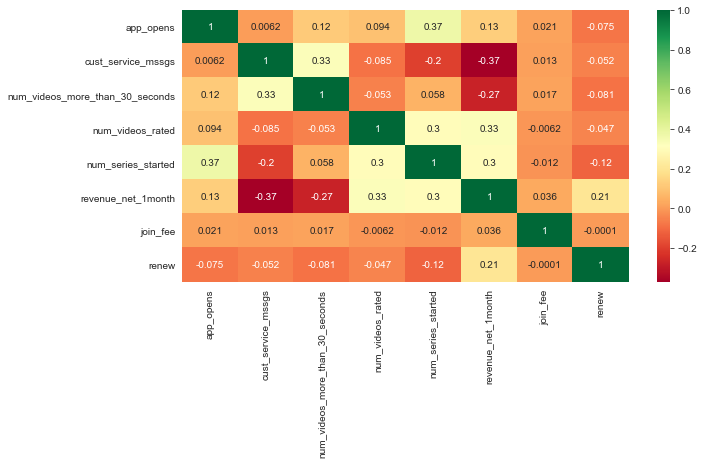

In [541]:
X = df_agg[var]
X = df_agg[var]
plt.subplots(figsize=(10, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [580]:
df_agg = df_agg.reset_index()
df_agg

,subid,app_opens,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,revenue_net_1month,join_fee,plan_type,preferred_genre,attribution_technical,intended_use,package_type,renew
0,20000062,1.000000,0.750000,5.750000,0.000000,0.250000,0.0000,0.0367,base_uae_14_day_trial,NaN,facebook,expand regional access,NaN,False
1,20000405,1.250000,1.000000,4.250000,0.000000,0.250000,0.0000,0.6606,base_uae_14_day_trial,comedy,facebook,access to exclusive content,enhanced,False
2,20000604,0.933333,0.333333,4.533333,0.000000,0.066667,4.5875,NaN,base_uae_14_day_trial,comedy,facebook,replace OTT,economy,False
3,20000685,1.210526,0.263158,4.342105,0.000000,0.210526,3.6700,0.3303,base_uae_14_day_trial,comedy,referral,other,base,False
4,20000741,0.500000,0.500000,3.500000,0.000000,0.000000,0.0000,0.0367,base_uae_14_day_trial,comedy,facebook,access to exclusive content,base,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135014,29999740,1.071429,0.214286,2.214286,0.000000,0.000000,0.0000,0.0367,base_uae_14_day_trial,NaN,brand sem intent google,expand regional access,NaN,False
135015,29999820,1.200000,0.600000,5.000000,0.000000,0.700000,0.0000,0.0367,base_uae_14_day_trial,comedy,facebook,replace OTT,base,False
135016,29999822,1.000000,0.800000,5.000000,0.000000,0.200000,0.0000,0.1101,base_uae_14_day_trial,drama,facebook,access to exclusive content,base,False
135017,29999889,3.223684,0.592105,4.289474,0.526316,0.894737,4.5875,NaN,base_uae_14_day_trial,comedy,brand sem intent google,access to exclusive content,economy,False


In [581]:
df_agg['renew'].value_counts()

False    129300
True       5719
Name: renew, dtype: int64

In [582]:
df_agg['revenue_net_1month'] = df_agg['revenue_net_1month'].fillna(0)

In [583]:
df_agg['join_fee'] = df_agg['join_fee'].fillna(0)

In [547]:
#df_agg['num_weekly_services_utilized'].fillna((df_agg['num_weekly_services_utilized'].mean()), inplace=True)

In [549]:
#df_agg['age'].fillna((df_agg['age'].mean()), inplace=True)

In [584]:
df_agg = df_agg.dropna()
df_agg

,subid,app_opens,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,revenue_net_1month,join_fee,plan_type,preferred_genre,attribution_technical,intended_use,package_type,renew
1,20000405,1.250000,1.000000,4.250000,0.000000,0.250000,0.0000,0.6606,base_uae_14_day_trial,comedy,facebook,access to exclusive content,enhanced,False
2,20000604,0.933333,0.333333,4.533333,0.000000,0.066667,4.5875,0.0000,base_uae_14_day_trial,comedy,facebook,replace OTT,economy,False
3,20000685,1.210526,0.263158,4.342105,0.000000,0.210526,3.6700,0.3303,base_uae_14_day_trial,comedy,referral,other,base,False
4,20000741,0.500000,0.500000,3.500000,0.000000,0.000000,0.0000,0.0367,base_uae_14_day_trial,comedy,facebook,access to exclusive content,base,False
5,20000796,4.826087,0.826087,4.413043,0.065217,0.913043,4.5875,0.0367,base_uae_14_day_trial,regional,facebook,replace OTT,enhanced,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135011,29999335,1.000000,0.416667,5.166667,0.000000,0.666667,0.0000,0.1101,base_uae_14_day_trial,regional,playstore,supplement OTT,base,False
135013,29999590,2.500000,0.166667,4.277778,0.000000,0.750000,3.4498,0.0000,base_uae_14_day_trial,comedy,email,replace OTT,base,False
135015,29999820,1.200000,0.600000,5.000000,0.000000,0.700000,0.0000,0.0367,base_uae_14_day_trial,comedy,facebook,replace OTT,base,False
135016,29999822,1.000000,0.800000,5.000000,0.000000,0.200000,0.0000,0.1101,base_uae_14_day_trial,drama,facebook,access to exclusive content,base,False


In [566]:
df_agg['renew'].value_counts()

False    104585
True       4304
Name: renew, dtype: int64

In [585]:

X = pd.get_dummies(data= df_agg, columns=['preferred_genre', 'attribution_technical', 'intended_use', 'package_type','plan_type'],drop_first = True).drop(['renew'],axis=1)

y = df_agg['renew']
#y_ = pd.get_dummies(data= df_agg,columns = ['renew'])

In [568]:
X

,subid,app_opens,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,revenue_net_1month,join_fee,preferred_genre_drama,preferred_genre_international,...,attribution_technical_vod,attribution_technical_youtube,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,package_type_economy,package_type_enhanced
1,20000405,1.250000,1.000000,4.250000,0.000000,0.250000,0.0000,0.6606,0,0,...,0,0,0,0,0,0,0,0,0,1
2,20000604,0.933333,0.333333,4.533333,0.000000,0.066667,4.5875,0.0000,0,0,...,0,0,0,0,0,0,1,0,1,0
3,20000685,1.210526,0.263158,4.342105,0.000000,0.210526,3.6700,0.3303,0,0,...,0,0,0,0,0,1,0,0,0,0
4,20000741,0.500000,0.500000,3.500000,0.000000,0.000000,0.0000,0.0367,0,0,...,0,0,0,0,0,0,0,0,0,0
5,20000796,4.826087,0.826087,4.413043,0.065217,0.913043,4.5875,0.0367,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135011,29999335,1.000000,0.416667,5.166667,0.000000,0.666667,0.0000,0.1101,0,0,...,0,0,0,0,0,0,0,1,0,0
135013,29999590,2.500000,0.166667,4.277778,0.000000,0.750000,3.4498,0.0000,0,0,...,0,0,0,0,0,0,1,0,0,0
135015,29999820,1.200000,0.600000,5.000000,0.000000,0.700000,0.0000,0.0367,0,0,...,0,0,0,0,0,0,1,0,0,0
135016,29999822,1.000000,0.800000,5.000000,0.000000,0.200000,0.0000,0.1101,1,0,...,0,0,0,0,0,0,0,0,0,0


In [569]:
y

1         False
2         False
3         False
4         False
5         False
          ...  
135011    False
135013    False
135015    False
135016    False
135017    False
Name: renew, Length: 108889, dtype: bool

In [570]:
y.value_counts()

False    104585
True       4304
Name: renew, dtype: int64

### Oversample 'renew = True' since renewal rate = 0.0411

In [753]:
pip install imbalanced-learn

     |████████████████████████████████| 163 kB 357 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [32]:
import imblearn
print(imblearn.__version__)

0.6.2


In [526]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [586]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled= SMOTE().fit_sample(X, y)

In [587]:
y_resampled.value_counts()

True     104585
False    104585
Name: renew, dtype: int64

In [556]:
X_resampled

,subid,app_opens,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,revenue_net_1month,join_fee,preferred_genre_drama,preferred_genre_international,...,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,package_type_economy,package_type_enhanced,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial
0,20000405,1.250000,1.000000,4.250000,0.000000,0.250000,0.000000,0.660600,0,0,...,0,0,0,0,1,1,0,0,0,0
1,20000604,0.933333,0.333333,4.533333,0.000000,0.066667,4.587500,0.000000,0,0,...,0,1,0,1,0,1,0,0,0,0
2,20000685,1.210526,0.263158,4.342105,0.000000,0.210526,3.670000,0.330300,0,0,...,1,0,0,0,0,1,0,0,0,0
3,20000741,0.500000,0.500000,3.500000,0.000000,0.000000,0.000000,0.036700,0,0,...,0,0,0,0,0,1,0,0,0,0
4,20000796,4.826087,0.826087,4.413043,0.065217,0.913043,4.587500,0.036700,0,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209165,20406571,1.494876,0.575321,4.631894,0.000000,0.629169,1.257140,0.026643,0,0,...,0,0,0,0,0,1,0,0,0,0
209166,25309917,1.756995,0.149484,4.055963,0.000000,0.243005,4.587500,0.000000,0,0,...,0,0,0,0,0,1,0,0,0,0
209167,29653922,1.000000,0.986938,5.943261,0.000000,0.338912,4.587500,0.651941,0,0,...,0,0,0,0,0,1,0,0,0,0
209168,28583933,0.494585,0.200000,5.294585,0.000000,0.000000,4.587500,0.005785,0,0,...,0,0,0,0,0,1,0,0,0,0


In [806]:
engagement

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
28832315,28409777,2020-04-21,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832317,28409777,2020-04-22,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832319,28409777,2020-04-23,0.0,0.0,4.0,4.0,0.0,1.0,1.0
28832321,28409777,2020-04-24,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [588]:
X_resampled.drop('subid', axis=1, inplace=True)

In [485]:
y_resampled

0         False
1         False
2         False
3         False
4         False
          ...  
209165     True
209166     True
209167     True
209168     True
209169     True
Name: renew, Length: 209170, dtype: bool

In [486]:
X_resampled

,app_opens,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,revenue_net_1month,join_fee,age,num_weekly_services_utilized,weekly_consumption_hour,...,intended_use_replace OTT,intended_use_supplement OTT,package_type_economy,package_type_enhanced,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,male_TF_True
0,1.250000,1.000000,4.250000,0.000000,0.250000,0.000000,0.660600,48.000000,3.952012,33.101274,...,0,0,0,1,1,0,0,0,0,0
1,0.933333,0.333333,4.533333,0.000000,0.066667,4.587500,0.000000,225.398439,2.995882,27.956766,...,1,0,1,0,1,0,0,0,0,0
2,1.210526,0.263158,4.342105,0.000000,0.210526,3.670000,0.330300,67.000000,2.817946,25.851492,...,0,0,0,0,1,0,0,0,0,0
3,0.500000,0.500000,3.500000,0.000000,0.000000,0.000000,0.036700,75.000000,2.995882,25.851492,...,0,0,0,0,1,0,0,0,0,0
4,4.826087,0.826087,4.413043,0.065217,0.913043,4.587500,0.036700,34.000000,2.377153,22.951579,...,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209165,1.179260,0.211482,3.603701,0.000000,0.000000,4.981332,0.000000,225.398439,2.995882,27.956766,...,0,0,0,0,1,0,0,0,0,0
209166,0.993395,0.982828,6.940559,0.000000,0.009246,4.594093,0.036700,57.022455,2.989241,27.138652,...,0,0,0,0,1,0,0,0,0,0
209167,2.035626,0.092177,3.838895,0.000000,0.092177,4.682876,0.582565,49.038636,2.776670,26.456896,...,0,0,0,0,1,0,0,0,0,0
209168,1.865214,0.730428,5.404357,0.000000,0.365214,4.655154,0.000000,225.398439,2.995882,27.956766,...,0,0,0,1,1,0,0,0,0,0


In [1046]:
X_resampled.columns

Index(['app_opens', 'cust_service_mssgs', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started', 'revenue_net_1month',
       'join_fee', 'preferred_genre_drama', 'preferred_genre_international',
       'preferred_genre_other', 'preferred_genre_regional',
       'attribution_technical_appstore', 'attribution_technical_bing',
       'attribution_technical_bing_organic',
       'attribution_technical_brand sem intent bing',
       'attribution_technical_brand sem intent google',
       'attribution_technical_content_greatist',
       'attribution_technical_criteo', 'attribution_technical_direct_mail',
       'attribution_technical_discovery', 'attribution_technical_display',
       'attribution_technical_email', 'attribution_technical_email_blast',
       'attribution_technical_facebook',
       'attribution_technical_facebook_organic',
       'attribution_technical_google_organic',
       'attribution_technical_influencer', 'attribution_technical_internal',


### Logistic Regression

In [591]:
var = list(X_resampled.columns)

var

['app_opens',
 'cust_service_mssgs',
 'num_videos_more_than_30_seconds',
 'num_videos_rated',
 'num_series_started',
 'revenue_net_1month',
 'join_fee',
 'preferred_genre_drama',
 'preferred_genre_international',
 'preferred_genre_other',
 'preferred_genre_regional',
 'attribution_technical_appstore',
 'attribution_technical_bing',
 'attribution_technical_bing_organic',
 'attribution_technical_brand sem intent bing',
 'attribution_technical_brand sem intent google',
 'attribution_technical_content_greatist',
 'attribution_technical_criteo',
 'attribution_technical_direct_mail',
 'attribution_technical_discovery',
 'attribution_technical_display',
 'attribution_technical_email',
 'attribution_technical_email_blast',
 'attribution_technical_facebook',
 'attribution_technical_facebook_organic',
 'attribution_technical_google_organic',
 'attribution_technical_influencer',
 'attribution_technical_internal',
 'attribution_technical_organic',
 'attribution_technical_other',
 'attribution_tech

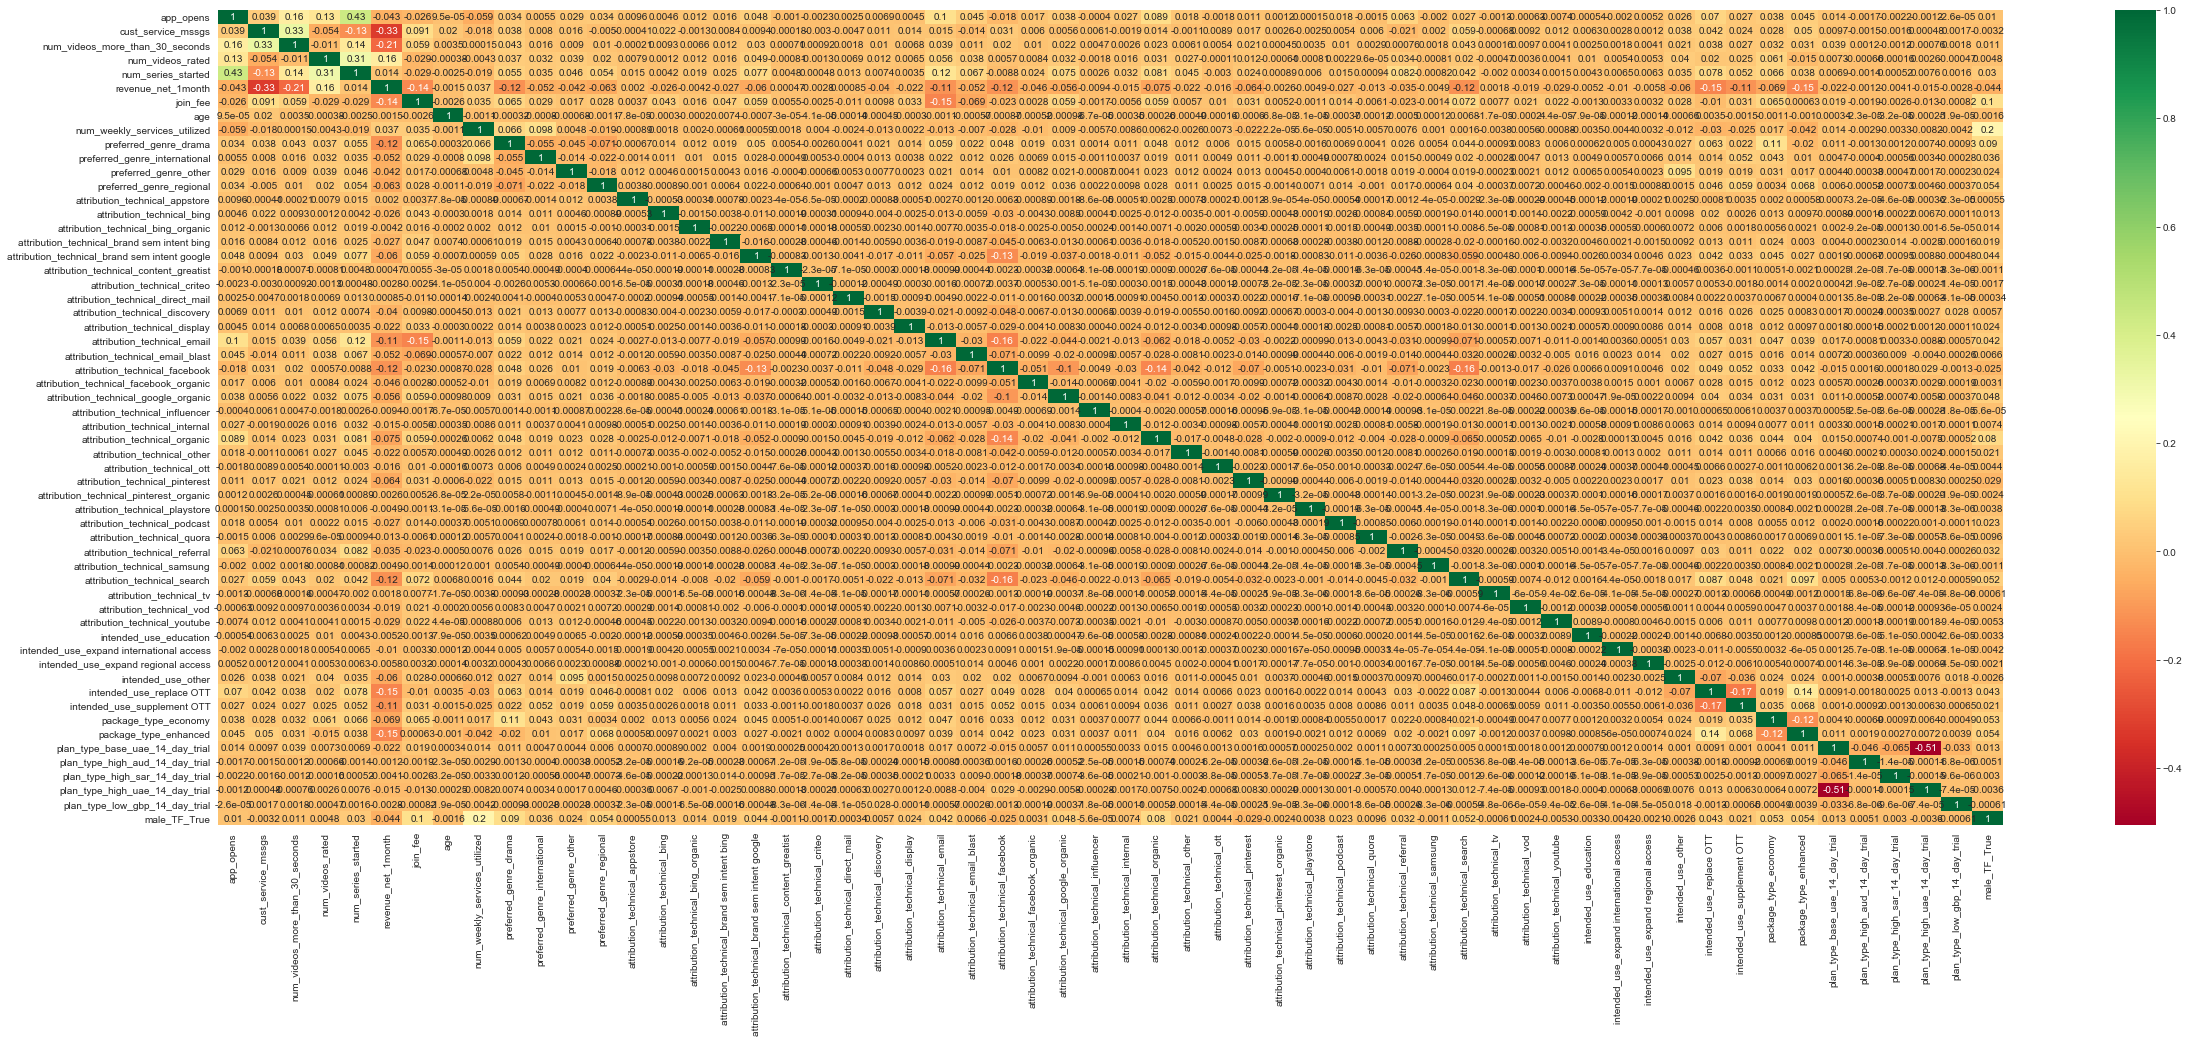

In [531]:
X = X_resampled[var]
X = X_resampled[var]
plt.subplots(figsize=(40, 15))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [831]:
!pip install git+https://github.com/scikit-learn-contrib/stability-selection.git

  Cloning https://github.com/scikit-learn-contrib/stability-selection.git to /private/var/folders/3z/3kvs950d1pq_y1cs_0nt5lm00000gn/T/pip-req-build-3kmwkji0
  Running command git clone -q https://github.com/scikit-learn-contrib/stability-selection.git /private/var/folders/3z/3kvs950d1pq_y1cs_0nt5lm00000gn/T/pip-req-build-3kmwkji0
  Created wheel for stability-selection: filename=stability_selection-0.0.1-py3-none-any.whl size=14461 sha256=727a773d2a0b82497cf5fad16e7d3cb89b065be3a85d2a0222e6257b3ede6716
  Stored in directory: /private/var/folders/3z/3kvs950d1pq_y1cs_0nt5lm00000gn/T/pip-ephem-wheel-cache-x1m_zxk6/wheels/77/b6/61/7b5825908e37bf767491bba9629f243693901d998376ad23b1
Successfully built stability-selection


In [592]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.utils import check_random_state
from stability_selection import StabilitySelection

In [489]:
#base_estimator = Pipeline([
 #   ('scaler', RobustScaler()),
  #  ('model', LogisticRegression(solver = 'lbfgs',penalty='l2'))
#])

## Here stability selection is instantiated and run
#selector = StabilitySelection(base_estimator=base_estimator, lambda_name='model__C',
#                              lambda_grid=np.logspace(-5, -1, 50)).fit(x_train, y_train)
#print(selector.get_support(indices=True))

In [593]:
y_resampled.value_counts()

True     104585
False    104585
Name: renew, dtype: int64

In [594]:
y_resampled

0         False
1         False
2         False
3         False
4         False
          ...  
209165     True
209166     True
209167     True
209168     True
209169     True
Name: renew, Length: 209170, dtype: bool

In [595]:
dummy = pd.get_dummies(data = y_resampled, columns = 'renew')

In [247]:
dummy.columns

Index([False, True], dtype='object')

In [255]:
dummy

,False,True
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
209165,0,1
209166,0,1
209167,0,1
209168,0,1


In [ ]:
y_ = pd.get_dummies(data= df_agg,columns = ['renew'])

In [219]:
y.value_counts()

True     104585
False    104585
Name: renew, dtype: int64

In [596]:
X_resampled.columns

Index(['app_opens', 'cust_service_mssgs', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started', 'revenue_net_1month',
       'join_fee', 'preferred_genre_drama', 'preferred_genre_international',
       'preferred_genre_other', 'preferred_genre_regional',
       'attribution_technical_appstore', 'attribution_technical_bing',
       'attribution_technical_bing_organic',
       'attribution_technical_brand sem intent bing',
       'attribution_technical_brand sem intent google',
       'attribution_technical_content_greatist',
       'attribution_technical_criteo', 'attribution_technical_direct_mail',
       'attribution_technical_discovery', 'attribution_technical_display',
       'attribution_technical_email', 'attribution_technical_email_blast',
       'attribution_technical_facebook',
       'attribution_technical_facebook_organic',
       'attribution_technical_google_organic',
       'attribution_technical_influencer', 'attribution_technical_internal',


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Train/Test split results:
LogisticRegression accuracy is 0.924
LogisticRegression log_loss is 0.194
LogisticRegression auc is 0.977


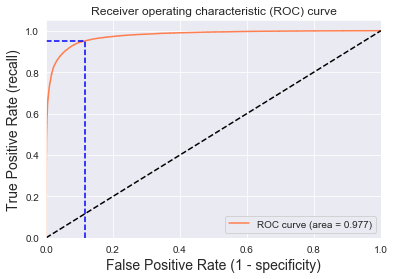

Using a threshold of 0.332 guarantees a sensitivity of 0.950 and a specificity of 0.885, i.e. a false positive rate of 11.50%.


In [1053]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = X_resampled[var]
#X = sneaker_n[Selected_features2]
# X = log_dataFrame[Selected_features]
y = y_resampled
# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

#### predicting for nenew_True = 1

In [614]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.93      0.92     20693
        True       0.93      0.92      0.92     21141

    accuracy                           0.92     41834
   macro avg       0.92      0.92      0.92     41834
weighted avg       0.92      0.92      0.92     41834



In [598]:
y_train.value_counts()

False    83892
True     83444
Name: renew, dtype: int64

In [599]:
X_train

,app_opens,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,revenue_net_1month,join_fee,preferred_genre_drama,preferred_genre_international,preferred_genre_other,...,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,package_type_economy,package_type_enhanced,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial
10043,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.036700,1,0,0,...,0,0,0,0,1,1,0,0,0,0
79582,0.500000,0.000000,5.000000,0.000000,0.500000,0.000000,0.660600,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4204,1.855263,0.328947,4.250000,0.092105,0.973684,4.587500,0.000000,1,0,0,...,0,1,0,0,0,1,0,0,0,0
194791,0.787836,1.108304,3.835322,0.000000,0.000000,4.671356,0.000000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
84663,1.000000,1.000000,6.000000,0.000000,0.666667,0.000000,0.036700,1,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175638,1.514351,0.628588,6.114237,0.000000,0.000000,4.587500,0.254835,0,0,0,...,0,0,0,0,0,1,0,0,0,0
95816,1.285714,0.142857,4.142857,0.000000,0.000000,4.587500,0.330300,0,0,0,...,0,0,1,0,1,1,0,0,0,0
203245,1.841707,0.788943,6.208537,0.000000,0.026382,0.000000,0.000000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
100879,1.000000,0.666667,5.666667,0.000000,0.000000,0.000000,0.660600,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [607]:
y_pred_proba

array([5.51220632e-03, 9.77490147e-01, 3.85972834e-01, ...,
       5.52188083e-03, 3.56769563e-04, 2.83059069e-02])

In [601]:
y_test

73006     False
153229     True
31448     False
144701     True
101565    False
          ...  
81198     False
207652     True
94509     False
30971     False
79433     False
Name: renew, Length: 41834, dtype: bool

In [609]:
X_test

,app_opens,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,revenue_net_1month,join_fee,preferred_genre_drama,preferred_genre_international,preferred_genre_other,...,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,package_type_economy,package_type_enhanced,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial
73006,7.934783,0.347826,4.326087,0.043478,0.869565,4.587500,0.000000,0,0,0,...,0,0,1,0,0,1,0,0,0,0
153229,1.403923,0.359155,4.356137,0.020121,0.459759,4.587500,0.190294,0,0,0,...,0,0,0,0,1,1,0,0,0,0
31448,0.871795,0.384615,4.051282,0.000000,0.743590,4.587500,0.036700,0,0,0,...,0,0,0,0,0,1,0,0,0,0
144701,1.349408,0.173369,2.058068,0.000000,0.160854,4.587500,0.022138,0,0,0,...,0,0,0,0,0,1,0,0,0,0
101565,1.000000,1.500000,6.000000,0.000000,0.000000,0.000000,0.330300,1,0,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81198,1.000000,0.666667,6.000000,0.000000,0.333333,0.000000,0.036700,0,0,0,...,0,0,0,0,0,1,0,0,0,0
207652,1.976755,0.873593,5.038686,0.000000,0.258809,4.724609,0.000000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
94509,1.000000,0.500000,4.250000,0.000000,0.000000,0.000000,0.036700,0,0,0,...,0,0,1,0,0,1,0,0,0,0
30971,2.642857,0.571429,4.571429,0.000000,0.785714,0.000000,0.660600,1,0,0,...,0,1,0,0,1,1,0,0,0,0


In [209]:
(logreg.predict_proba(X_test))[:, 1] #predicting for nenew = false

array([6.52605047e-03, 9.44164557e-01, 3.82628119e-01, ...,
       6.60761384e-03, 3.16865005e-04, 2.95951164e-02])

In [610]:
new_df = pd.DataFrame()  
new_df['renew_prob'] = y_pred_proba

In [611]:
X_test = X_test.reset_index()

In [612]:
df_c = pd.concat([X_test, new_df],axis = 1)

In [613]:
df_c

,index,app_opens,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,revenue_net_1month,join_fee,preferred_genre_drama,preferred_genre_international,...,intended_use_replace OTT,intended_use_supplement OTT,package_type_economy,package_type_enhanced,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,renew_prob
0,73006,7.934783,0.347826,4.326087,0.043478,0.869565,4.587500,0.000000,0,0,...,0,1,0,0,1,0,0,0,0,0.005512
1,153229,1.403923,0.359155,4.356137,0.020121,0.459759,4.587500,0.190294,0,0,...,0,0,0,1,1,0,0,0,0,0.977490
2,31448,0.871795,0.384615,4.051282,0.000000,0.743590,4.587500,0.036700,0,0,...,0,0,0,0,1,0,0,0,0,0.385973
3,144701,1.349408,0.173369,2.058068,0.000000,0.160854,4.587500,0.022138,0,0,...,0,0,0,0,1,0,0,0,0,0.995865
4,101565,1.000000,1.500000,6.000000,0.000000,0.000000,0.000000,0.330300,1,0,...,1,0,0,1,1,0,0,0,0,0.019795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41829,81198,1.000000,0.666667,6.000000,0.000000,0.333333,0.000000,0.036700,0,0,...,0,0,0,0,1,0,0,0,0,0.059720
41830,207652,1.976755,0.873593,5.038686,0.000000,0.258809,4.724609,0.000000,0,0,...,0,0,0,0,1,0,0,0,0,0.996054
41831,94509,1.000000,0.500000,4.250000,0.000000,0.000000,0.000000,0.036700,0,0,...,0,1,0,0,1,0,0,0,0,0.005522
41832,30971,2.642857,0.571429,4.571429,0.000000,0.785714,0.000000,0.660600,1,0,...,1,0,0,1,1,0,0,0,0,0.000357


In [72]:
x_test.shape

(62751, 51)

In [65]:
y_test.value_counts()

True     21141
False    20693
Name: renew, dtype: int64

In [1054]:
var

['app_opens',
 'cust_service_mssgs',
 'num_videos_more_than_30_seconds',
 'num_videos_rated',
 'num_series_started',
 'revenue_net_1month',
 'join_fee',
 'preferred_genre_drama',
 'preferred_genre_international',
 'preferred_genre_other',
 'preferred_genre_regional',
 'attribution_technical_appstore',
 'attribution_technical_bing',
 'attribution_technical_bing_organic',
 'attribution_technical_brand sem intent bing',
 'attribution_technical_brand sem intent google',
 'attribution_technical_content_greatist',
 'attribution_technical_criteo',
 'attribution_technical_direct_mail',
 'attribution_technical_discovery',
 'attribution_technical_display',
 'attribution_technical_email',
 'attribution_technical_email_blast',
 'attribution_technical_facebook',
 'attribution_technical_facebook_organic',
 'attribution_technical_google_organic',
 'attribution_technical_influencer',
 'attribution_technical_internal',
 'attribution_technical_organic',
 'attribution_technical_other',
 'attribution_tech

In [1055]:
logreg.coef_

array([[-2.98386775e-01,  1.87230086e-01,  7.42774990e-02,
        -1.04071919e+01, -2.28129403e+00,  7.32750542e-01,
        -2.05830912e-01, -1.33116956e+00, -1.89281345e+00,
        -1.74848843e+00, -1.48299672e+00, -6.03276870e-01,
        -5.22699715e+00, -3.70706048e+00, -6.46298464e+00,
        -4.97209614e+00, -1.23853222e-01, -2.23134050e-01,
        -1.90969583e+00, -4.94614343e+00, -4.91733988e+00,
        -5.19265632e+00, -4.43278918e+00, -3.56695245e+00,
        -5.83688804e+00, -5.64678827e+00, -2.55057830e-01,
        -5.15362871e+00, -4.86715713e+00, -5.96691336e+00,
        -2.09554647e+00, -5.09717820e+00, -4.79265016e-01,
        -6.70938551e-02, -5.70297481e+00, -1.60074616e+00,
        -5.35375519e+00, -1.28495917e-01, -4.52987182e+00,
        -7.43589497e-02, -3.26703162e+00, -5.42278276e+00,
        -2.04937230e-01, -6.18842951e-01, -8.28261768e-01,
        -1.80894026e+00, -1.09938959e+00, -1.65817972e+00,
        -1.63925935e+00, -9.76420786e-01, -1.23561037e+0

## Decision Tree

In [634]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier



param_test = {
        'max_depth': [2,3,4,5,6]
    }

estimator = DecisionTreeClassifier(random_state = 0)
gsearch = GridSearchCV(estimator, param_grid = param_test, cv=10)
gsearch.fit(X_train,y_train)
print(gsearch.best_params_)

{'max_depth': 6}


In [637]:
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(max_depth = gsearch.best_params_['max_depth'],random_state = 0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9094038342018453

In [638]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.90      0.91     20693
        True       0.90      0.92      0.91     21141

    accuracy                           0.91     41834
   macro avg       0.91      0.91      0.91     41834
weighted avg       0.91      0.91      0.91     41834



In [1051]:
clf = RandomForestClassifier(max_depth = 9, n_estimators = 150)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9272362193431181

In [1052]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.90      0.92     20693
        True       0.91      0.95      0.93     21141

    accuracy                           0.93     41834
   macro avg       0.93      0.93      0.93     41834
weighted avg       0.93      0.93      0.93     41834



## CLV

In [641]:
df_c

,index,app_opens,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,revenue_net_1month,join_fee,preferred_genre_drama,preferred_genre_international,...,intended_use_replace OTT,intended_use_supplement OTT,package_type_economy,package_type_enhanced,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,renew_prob
0,73006,7.934783,0.347826,4.326087,0.043478,0.869565,4.587500,0.000000,0,0,...,0,1,0,0,1,0,0,0,0,0.005512
1,153229,1.403923,0.359155,4.356137,0.020121,0.459759,4.587500,0.190294,0,0,...,0,0,0,1,1,0,0,0,0,0.977490
2,31448,0.871795,0.384615,4.051282,0.000000,0.743590,4.587500,0.036700,0,0,...,0,0,0,0,1,0,0,0,0,0.385973
3,144701,1.349408,0.173369,2.058068,0.000000,0.160854,4.587500,0.022138,0,0,...,0,0,0,0,1,0,0,0,0,0.995865
4,101565,1.000000,1.500000,6.000000,0.000000,0.000000,0.000000,0.330300,1,0,...,1,0,0,1,1,0,0,0,0,0.019795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41829,81198,1.000000,0.666667,6.000000,0.000000,0.333333,0.000000,0.036700,0,0,...,0,0,0,0,1,0,0,0,0,0.059720
41830,207652,1.976755,0.873593,5.038686,0.000000,0.258809,4.724609,0.000000,0,0,...,0,0,0,0,1,0,0,0,0,0.996054
41831,94509,1.000000,0.500000,4.250000,0.000000,0.000000,0.000000,0.036700,0,0,...,0,1,0,0,1,0,0,0,0,0.005522
41832,30971,2.642857,0.571429,4.571429,0.000000,0.785714,0.000000,0.660600,1,0,...,1,0,0,1,1,0,0,0,0,0.000357


In [642]:
df_c['renew_prob'].describe()

count    4.183400e+04
mean     5.048950e-01
std      4.368439e-01
min      2.216119e-08
25%      2.872253e-02
50%      4.985362e-01
75%      9.848907e-01
max      9.995285e-01
Name: renew_prob, dtype: float64

### Calculate 'adjusted_renew_probability' to match churn rate in original dataset

In [650]:
A = (df_c['renew_prob']/(0.5/0.04)) #0.07552 0.0798
B = ((1-df_c['renew_prob'])/(0.5/0.96)) #0.10752 0.000168

In [651]:
p_ = A/(A+B)
q_ = B/(A+B)
p_

0        0.000231
1        0.644049
2        0.025523
3        0.909380
4        0.000841
           ...   
41829    0.002639
41830    0.913169
41831    0.000231
41832    0.000015
41833    0.001212
Name: renew_prob, Length: 41834, dtype: float64

In [652]:
df_c['adjusted_renew_prob']= p_

In [654]:
df_c

,index,app_opens,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,revenue_net_1month,join_fee,preferred_genre_drama,preferred_genre_international,...,intended_use_supplement OTT,package_type_economy,package_type_enhanced,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,renew_prob,adjusted_renew_prob
0,73006,7.934783,0.347826,4.326087,0.043478,0.869565,4.587500,0.000000,0,0,...,1,0,0,1,0,0,0,0,0.005512,0.000231
1,153229,1.403923,0.359155,4.356137,0.020121,0.459759,4.587500,0.190294,0,0,...,0,0,1,1,0,0,0,0,0.977490,0.644049
2,31448,0.871795,0.384615,4.051282,0.000000,0.743590,4.587500,0.036700,0,0,...,0,0,0,1,0,0,0,0,0.385973,0.025523
3,144701,1.349408,0.173369,2.058068,0.000000,0.160854,4.587500,0.022138,0,0,...,0,0,0,1,0,0,0,0,0.995865,0.909380
4,101565,1.000000,1.500000,6.000000,0.000000,0.000000,0.000000,0.330300,1,0,...,0,0,1,1,0,0,0,0,0.019795,0.000841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41829,81198,1.000000,0.666667,6.000000,0.000000,0.333333,0.000000,0.036700,0,0,...,0,0,0,1,0,0,0,0,0.059720,0.002639
41830,207652,1.976755,0.873593,5.038686,0.000000,0.258809,4.724609,0.000000,0,0,...,0,0,0,1,0,0,0,0,0.996054,0.913169
41831,94509,1.000000,0.500000,4.250000,0.000000,0.000000,0.000000,0.036700,0,0,...,1,0,0,1,0,0,0,0,0.005522,0.000231
41832,30971,2.642857,0.571429,4.571429,0.000000,0.785714,0.000000,0.660600,1,0,...,0,0,1,1,0,0,0,0,0.000357,0.000015


In [655]:
len(subscribers['subid'].unique())

227628

In [656]:
spend

,month,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
2,2019-06-30 00:00:00,84800,75000,17300,21400,11900,10500,5900,6100
3,2019-07-31 00:00:00,60000,75600,17300,21300,12000,29800,6000,6600
4,2019-08-31 00:00:00,52300,76100,18100,21300,16300,65900,6200,6800
5,2019-09-30 00:00:00,49000,75800,18900,21300,16400,73700,6000,7400
6,2019-10-31 00:00:00,51300,76000,21000,21400,12200,32300,6700,7300
7,2019-11-30 00:00:00,56100,75900,21400,21600,11700,9800,6300,7300
8,2019-12-31 00:00:00,51400,76100,32100,22200,12100,3500,7200,8000
9,2020-01-31 00:00:00,49000,75500,33600,22700,14300,300,6700,7400
10,2020-02-29 00:00:00,49700,76600,30100,21700,15000,300,6400,6500
11,2020-03-31 00:00:00,49100,78000,22700,21200,17600,300,5900,10000


In [345]:
spend = spend.drop([1]+[0])

In [346]:
spend

,month,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
2,2019-06-30 00:00:00,84800,75000,17300,21400,11900,10500,5900,6100
3,2019-07-31 00:00:00,60000,75600,17300,21300,12000,29800,6000,6600
4,2019-08-31 00:00:00,52300,76100,18100,21300,16300,65900,6200,6800
5,2019-09-30 00:00:00,49000,75800,18900,21300,16400,73700,6000,7400
6,2019-10-31 00:00:00,51300,76000,21000,21400,12200,32300,6700,7300
7,2019-11-30 00:00:00,56100,75900,21400,21600,11700,9800,6300,7300
8,2019-12-31 00:00:00,51400,76100,32100,22200,12100,3500,7200,8000
9,2020-01-31 00:00:00,49000,75500,33600,22700,14300,300,6700,7400
10,2020-02-29 00:00:00,49700,76600,30100,21700,15000,300,6400,6500
11,2020-03-31 00:00:00,49100,78000,22700,21200,17600,300,5900,10000


In [657]:
spend.sum()

facebook                   552700
email                      760600
search                     232500
brand sem intent google    216100
affiliate                  139500
email_blast                226400
pinterest                   63300
referral                    73400
dtype: int64

In [658]:
spend_t = sum(spend.sum()[0:8])

In [659]:
spend_t

2264500

In [662]:
df_tt = pd.merge(subscribers,csr, how = 'outer', on ='subid')

In [663]:
df_tt = pd.merge(df_tt, engagement, how = 'outer')

In [664]:
len(df_tt['subid'].unique()) #1461938

1461938

In [665]:
len(subscribers['subid'].unique())

227628

In [666]:
cac = spend_t/len(df_tt['subid'].unique())

In [667]:
cac

1.5489712970043874

In [668]:
r = 0.1

In [669]:
df_c['revenue_net_1month']

0        4.587500
1        4.587500
2        4.587500
3        4.587500
4        0.000000
           ...   
41829    0.000000
41830    4.724609
41831    0.000000
41832    0.000000
41833    4.587500
Name: revenue_net_1month, Length: 41834, dtype: float64

In [670]:
clv = df_c['revenue_net_1month']*((1+r)/((1+r)-df_c['adjusted_renew_prob']))-cac

In [671]:
clv

0         3.039492
1         9.518553
2         3.147499
3        24.923869
4        -1.548971
           ...    
41829    -1.548971
41830    26.267934
41831    -1.548971
41832    -1.548971
41833     3.043590
Length: 41834, dtype: float64

In [672]:
df_c['clv']= clv

In [673]:
df_c['clv'].describe()

count    41834.000000
mean         6.954684
std         10.820625
min         -7.127753
25%         -1.548971
50%          3.082930
75%         10.701687
max         49.309336
Name: clv, dtype: float64

In [674]:
df_c

,index,app_opens,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,revenue_net_1month,join_fee,preferred_genre_drama,preferred_genre_international,...,package_type_economy,package_type_enhanced,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,renew_prob,adjusted_renew_prob,clv
0,73006,7.934783,0.347826,4.326087,0.043478,0.869565,4.587500,0.000000,0,0,...,0,0,1,0,0,0,0,0.005512,0.000231,3.039492
1,153229,1.403923,0.359155,4.356137,0.020121,0.459759,4.587500,0.190294,0,0,...,0,1,1,0,0,0,0,0.977490,0.644049,9.518553
2,31448,0.871795,0.384615,4.051282,0.000000,0.743590,4.587500,0.036700,0,0,...,0,0,1,0,0,0,0,0.385973,0.025523,3.147499
3,144701,1.349408,0.173369,2.058068,0.000000,0.160854,4.587500,0.022138,0,0,...,0,0,1,0,0,0,0,0.995865,0.909380,24.923869
4,101565,1.000000,1.500000,6.000000,0.000000,0.000000,0.000000,0.330300,1,0,...,0,1,1,0,0,0,0,0.019795,0.000841,-1.548971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41829,81198,1.000000,0.666667,6.000000,0.000000,0.333333,0.000000,0.036700,0,0,...,0,0,1,0,0,0,0,0.059720,0.002639,-1.548971
41830,207652,1.976755,0.873593,5.038686,0.000000,0.258809,4.724609,0.000000,0,0,...,0,0,1,0,0,0,0,0.996054,0.913169,26.267934
41831,94509,1.000000,0.500000,4.250000,0.000000,0.000000,0.000000,0.036700,0,0,...,0,0,1,0,0,0,0,0.005522,0.000231,-1.548971
41832,30971,2.642857,0.571429,4.571429,0.000000,0.785714,0.000000,0.660600,1,0,...,0,1,1,0,0,0,0,0.000357,0.000015,-1.548971


### Renenue illustration

In [677]:
#y_pred2 = clf.predict(X)

In [681]:
#X

,app_opens,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,revenue_net_1month,join_fee,preferred_genre_drama,preferred_genre_international,preferred_genre_other,...,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,package_type_economy,package_type_enhanced,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial
0,1.250000,1.000000,4.250000,0.000000,0.250000,0.000000,0.660600,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,0.933333,0.333333,4.533333,0.000000,0.066667,4.587500,0.000000,0,0,0,...,0,1,0,1,0,1,0,0,0,0
2,1.210526,0.263158,4.342105,0.000000,0.210526,3.670000,0.330300,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.500000,0.500000,3.500000,0.000000,0.000000,0.000000,0.036700,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.826087,0.826087,4.413043,0.065217,0.913043,4.587500,0.036700,0,0,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209165,1.703501,0.105240,3.435796,0.000000,0.209603,1.362201,0.036700,0,0,0,...,0,0,0,0,1,1,0,0,0,0
209166,1.414416,0.528528,4.492488,0.000000,0.285281,0.000000,0.043973,0,0,0,...,0,0,0,0,0,1,0,0,0,0
209167,0.754306,0.247129,4.222730,0.000000,0.247129,4.593821,0.325243,0,0,0,...,0,1,0,0,0,1,0,0,0,0
209168,0.740583,0.170717,5.201701,0.000000,0.532199,4.587500,0.027670,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [709]:
df_c

,index,app_opens,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,revenue_net_1month,join_fee,preferred_genre_drama,preferred_genre_international,...,package_type_economy,package_type_enhanced,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,renew_prob,adjusted_renew_prob,clv
0,73006,7.934783,0.347826,4.326087,0.043478,0.869565,4.587500,0.000000,0,0,...,0,0,1,0,0,0,0,0.005512,0.000231,3.039492
1,153229,1.403923,0.359155,4.356137,0.020121,0.459759,4.587500,0.190294,0,0,...,0,1,1,0,0,0,0,0.977490,0.644049,9.518553
2,31448,0.871795,0.384615,4.051282,0.000000,0.743590,4.587500,0.036700,0,0,...,0,0,1,0,0,0,0,0.385973,0.025523,3.147499
3,144701,1.349408,0.173369,2.058068,0.000000,0.160854,4.587500,0.022138,0,0,...,0,0,1,0,0,0,0,0.995865,0.909380,24.923869
4,101565,1.000000,1.500000,6.000000,0.000000,0.000000,0.000000,0.330300,1,0,...,0,1,1,0,0,0,0,0.019795,0.000841,-1.548971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41829,81198,1.000000,0.666667,6.000000,0.000000,0.333333,0.000000,0.036700,0,0,...,0,0,1,0,0,0,0,0.059720,0.002639,-1.548971
41830,207652,1.976755,0.873593,5.038686,0.000000,0.258809,4.724609,0.000000,0,0,...,0,0,1,0,0,0,0,0.996054,0.913169,26.267934
41831,94509,1.000000,0.500000,4.250000,0.000000,0.000000,0.000000,0.036700,0,0,...,0,0,1,0,0,0,0,0.005522,0.000231,-1.548971
41832,30971,2.642857,0.571429,4.571429,0.000000,0.785714,0.000000,0.660600,1,0,...,0,1,1,0,0,0,0,0.000357,0.000015,-1.548971


In [678]:
#y_pred2 = y_pred2.astype(int)

In [705]:
expected_revenue = (df_c['adjusted_renew_prob']*df_c['revenue_net_1month'])

In [706]:
expected_revenue

0        0.001059
1        2.954574
2        0.117086
3        4.171781
4        0.000000
           ...   
41829    0.000000
41830    4.314365
41831    0.000000
41832    0.000000
41833    0.005561
Length: 41834, dtype: float64

In [707]:
expected_revenue_sum = sum(expected_revenue)

In [708]:
expected_revenue_sum

54025.63384919637

#### Offer 20% off discount to everyone with 30% acceptance rate

In [711]:
df_c['accept'] = np.random.choice([0, 1], size=(41834), p=[0.7,0.3]) #

In [713]:
df_c['accept'].value_counts()

0    29335
1    12499
Name: accept, dtype: int64

In [726]:
reject, accept = [x for _, x in df_c.groupby(df_c['accept'] == 1)]

In [734]:
accept = accept.reset_index()

In [735]:
reject = reject.reset_index()

In [736]:
revenue_a = accept['revenue_net_1month']*(1-0.2)

In [737]:
accept

,level_0,index,app_opens,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,revenue_net_1month,join_fee,preferred_genre_drama,...,package_type_enhanced,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,renew_prob,adjusted_renew_prob,clv,accept
0,0,73006,7.934783,0.347826,4.326087,0.043478,0.869565,4.587500,0.000000,0,...,0,1,0,0,0,0,0.005512,0.000231,3.039492,1
1,1,153229,1.403923,0.359155,4.356137,0.020121,0.459759,4.587500,0.190294,0,...,1,1,0,0,0,0,0.977490,0.644049,9.518553,1
2,4,101565,1.000000,1.500000,6.000000,0.000000,0.000000,0.000000,0.330300,1,...,1,1,0,0,0,0,0.019795,0.000841,-1.548971,1
3,5,48183,1.100000,0.100000,2.700000,0.000000,0.200000,4.991200,0.000000,0,...,1,1,0,0,0,0,0.779060,0.128101,4.100093,1
4,6,121368,0.981269,0.313650,3.639549,0.018731,0.543202,4.587500,0.000000,0,...,0,1,0,0,0,0,0.990762,0.817133,16.290670,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12494,41820,171850,1.005779,0.282955,4.694658,0.125677,0.937162,4.587500,0.036700,0,...,0,1,0,0,0,0,0.938261,0.387711,5.535583,1
12495,41822,129437,1.246058,0.304242,4.362425,0.000000,0.000000,4.587500,0.006406,0,...,0,1,0,0,0,0,0.925110,0.339805,5.089124,1
12496,41824,20069,1.400000,0.300000,3.700000,0.000000,0.000000,4.587500,0.000000,0,...,1,1,0,0,0,0,0.585032,0.055483,3.282211,1
12497,41828,140354,1.394368,0.188056,5.461011,0.000000,0.264065,4.934213,0.283675,0,...,0,1,0,0,0,0,0.996635,0.925045,29.474045,1


In [740]:
sum_a = sum(revenue_a)

In [741]:
revenue_r = reject['revenue_net_1month']*reject['adjusted_renew_prob']

In [742]:
sum_r = sum(revenue_r)

In [743]:
revenue_sum_discount = sum_a + sum_r
revenue_sum_discount

65835.61231138554

### Making 20% off discount offer to only churn customers, assuming 30% of churn customers accept offer

In [745]:
non_churn, churn = [x for _, x in df_c.groupby(df_c['adjusted_renew_prob'] <= 0.5)]

In [749]:
churn

,index,app_opens,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,revenue_net_1month,join_fee,preferred_genre_drama,preferred_genre_international,...,package_type_enhanced,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,renew_prob,adjusted_renew_prob,clv,accept
0,73006,7.934783,0.347826,4.326087,0.043478,0.869565,4.5875,0.0000,0,0,...,0,1,0,0,0,0,0.005512,0.000231,3.039492,1
2,31448,0.871795,0.384615,4.051282,0.000000,0.743590,4.5875,0.0367,0,0,...,0,1,0,0,0,0,0.385973,0.025523,3.147499,0
4,101565,1.000000,1.500000,6.000000,0.000000,0.000000,0.0000,0.3303,1,0,...,1,1,0,0,0,0,0.019795,0.000841,-1.548971,1
5,48183,1.100000,0.100000,2.700000,0.000000,0.200000,4.9912,0.0000,0,0,...,1,1,0,0,0,0,0.779060,0.128101,4.100093,1
7,56652,3.800000,0.800000,5.000000,0.000000,0.700000,0.0000,0.0367,0,0,...,1,1,0,0,0,0,0.002849,0.000119,-1.548971,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41826,45582,2.142857,0.285714,5.428571,0.000000,0.142857,0.0000,0.0367,0,0,...,1,1,0,0,0,0,0.035197,0.001518,-1.548971,0
41829,81198,1.000000,0.666667,6.000000,0.000000,0.333333,0.0000,0.0367,0,0,...,0,1,0,0,0,0,0.059720,0.002639,-1.548971,0
41831,94509,1.000000,0.500000,4.250000,0.000000,0.000000,0.0000,0.0367,0,0,...,0,1,0,0,0,0,0.005522,0.000231,-1.548971,0
41832,30971,2.642857,0.571429,4.571429,0.000000,0.785714,0.0000,0.6606,1,0,...,1,1,0,0,0,0,0.000357,0.000015,-1.548971,0


In [750]:
churn['accept'] = np.random.choice([0, 1], size=(28464), p=[0.7,0.3])

In [756]:
churn_reject, churn_accept = [x for _, x in churn.groupby(churn['accept'] == 1)]

In [760]:
e_revenue_churn_accept = sum(churn_accept['revenue_net_1month']*(1-0.2))

In [761]:
e_revenue_churn_reject = sum(churn_reject['revenue_net_1month']*churn_reject['adjusted_renew_prob'])

In [766]:
e_revenue_non_churn = sum(non_churn['revenue_net_1month']*non_churn['adjusted_renew_prob'])

In [767]:
expected_revenue_d_c = e_revenue_churn_accept + e_revenue_churn_reject + e_revenue_non_churn 
expected_revenue_d_c 

66258.26905291222

In [769]:
(66258-65835)

423

In [ ]:
# total revenue has improved by 423 

## Exploratory_data_analysis

In [146]:
yes_renew1, no_renew1 = [x for _, x in df.groupby(df['renew'] == False)]
#nah1, yes_renew1 =[x for _, x in yes_renew.groupby(yes_renew['renew'] == True)]
#yes_renew1

In [150]:
no_renew1

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,customer_service_rep_id,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,last_payment,next_payment,renew
0,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0,32881490,False,2019-07-03 02:11:33,2019-07-01 02:18:45,14,False,OTT,0.0000,2019-07-01 06:59:20,NaT,False
1,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0,32881490,False,2019-07-03 02:11:33,2019-07-01 02:18:45,14,False,OTT,0.0000,2019-07-01 06:59:20,NaT,False
2,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0,32881490,False,2019-07-03 02:11:33,2019-07-01 02:18:45,14,False,OTT,0.0000,2019-07-01 06:59:20,NaT,False
3,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0,36472213,False,2019-07-15 01:38:19,2019-07-02 15:46:21,14,False,OTT,0.0000,2019-07-02 15:46:21,NaT,False
6,20848497,2019-07-03,1.0,1.0,6.0,6.0,0.0,1.0,0.0,36472213,False,2019-07-15 01:38:19,2019-07-02 15:46:21,14,False,OTT,0.0000,2019-07-02 15:46:21,NaT,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2585719,28409777,2020-04-21,2.0,0.0,4.0,4.0,0.0,1.0,1.0,33844228,True,NaT,2020-03-14 15:40:31,14,True,OTT,4.5875,2020-03-29 14:05:30,NaT,False
2585720,28409777,2020-04-22,2.0,0.0,4.0,4.0,0.0,1.0,1.0,33844228,True,NaT,2020-03-14 15:40:31,14,True,OTT,4.5875,2020-03-29 14:05:30,NaT,False
2585721,28409777,2020-04-23,0.0,0.0,4.0,4.0,0.0,1.0,1.0,33844228,True,NaT,2020-03-14 15:40:31,14,True,OTT,4.5875,2020-03-29 14:05:30,NaT,False
2585722,28409777,2020-04-24,1.0,0.0,3.0,4.0,1.0,1.0,1.0,33844228,True,NaT,2020-03-14 15:40:31,14,True,OTT,4.5875,2020-03-29 14:05:30,NaT,False


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

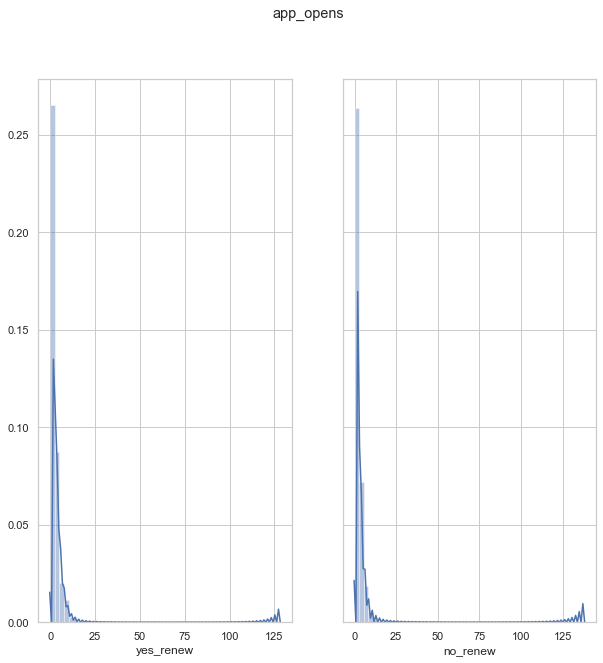

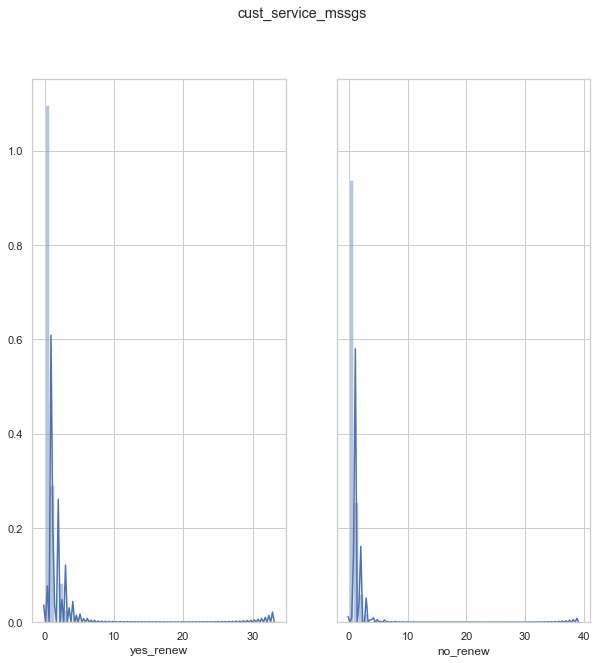

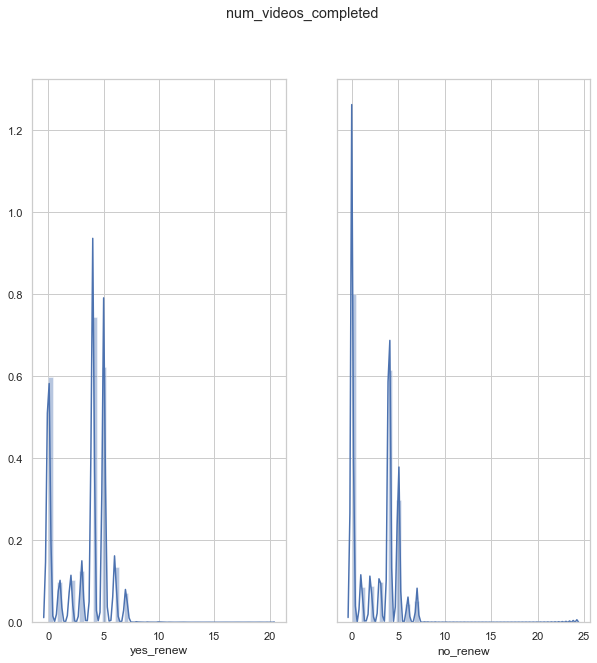

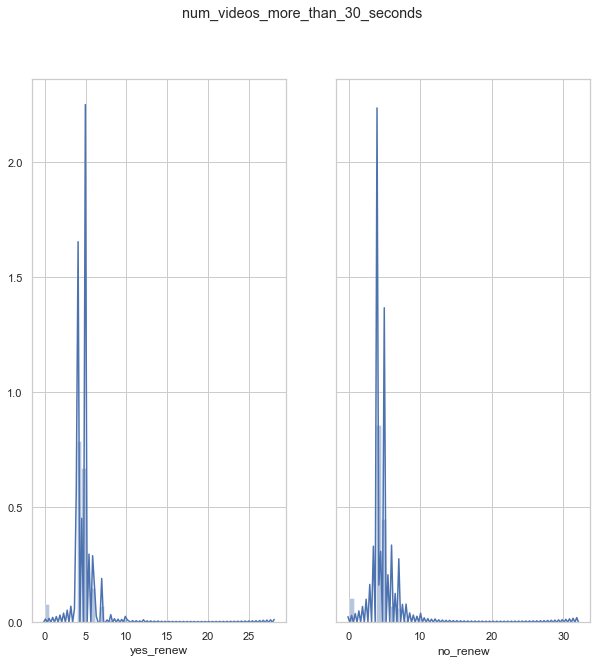

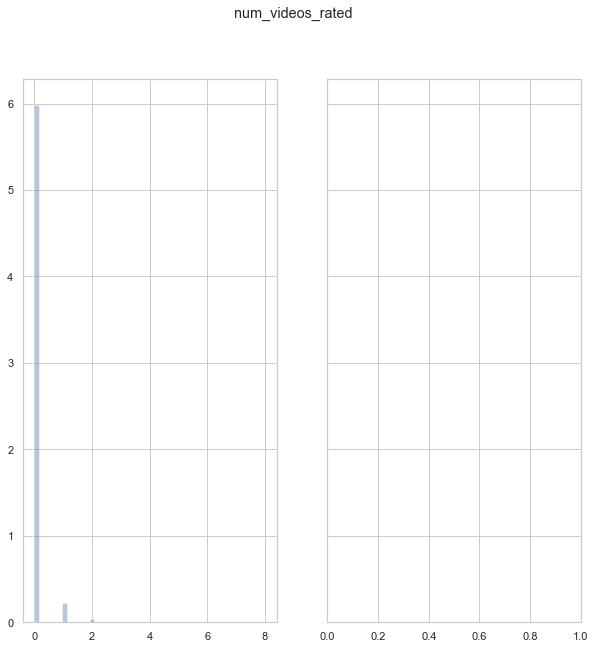

In [155]:
#categorical = ['package_type', 'preferred_genre', 'intended_use', 'attribution_technical','attribution_survey','plan_type', 'monthly_price', 'discount_price']
categorical = ['current_sub_TF','num_trial_days','trial_completed_TF','payment_period']
numeric = ['app_opens','cust_service_mssgs', 'num_videos_completed', 'num_videos_more_than_30_seconds','num_videos_rated',
          'num_series_started','revenue_net_1month']

# Split the data to two groups -- Group with deposit = yes and Group with deposit = no
# plot data using distribution plot for each numeric variable
for i in numeric:
    sns.set(style="whitegrid")
    #yes = df2.groupby('renew').get_group("True")
    #no = df2.groupby('renew').get_group("False")
    f, axes = plt.subplots(1, 2, figsize=(10, 10), sharey=True)
    f.suptitle(i)
    yes_array = pd.Series(list(yes_renew1[i]), name="yes_renew")
    no_array = pd.Series(list(no_renew1[i]), name="no_renew")
    sns.distplot(yes_array,ax = axes[0])
    sns.distplot(no_array,ax = axes[1])


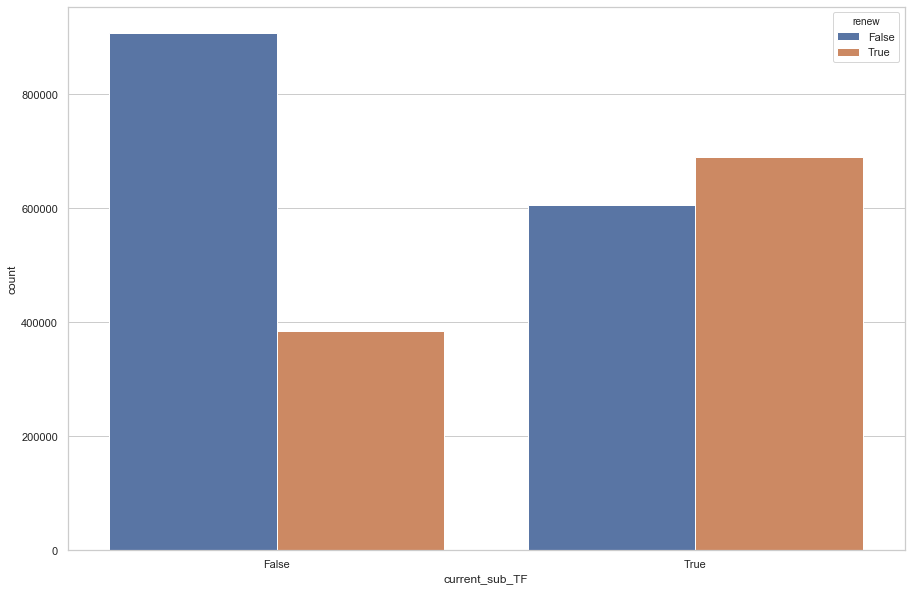

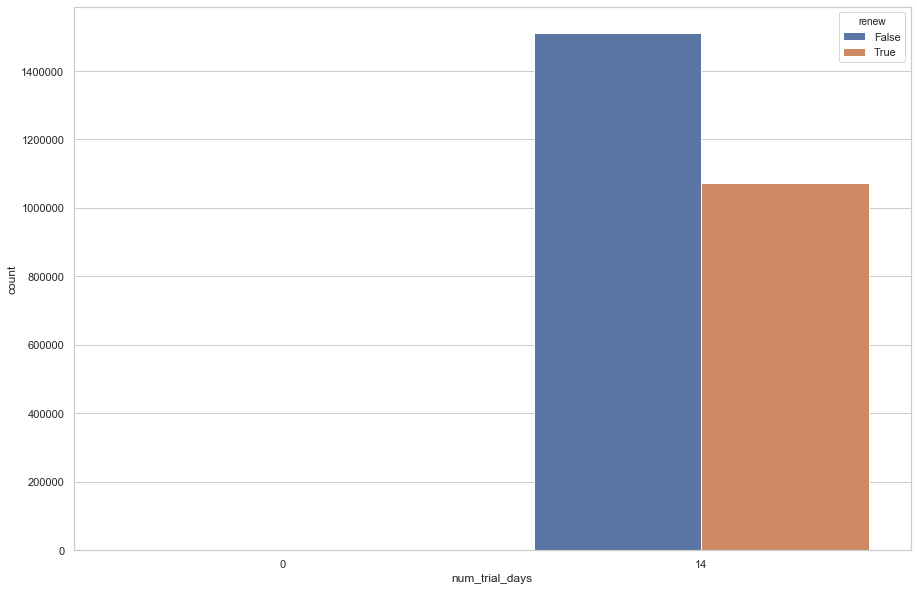

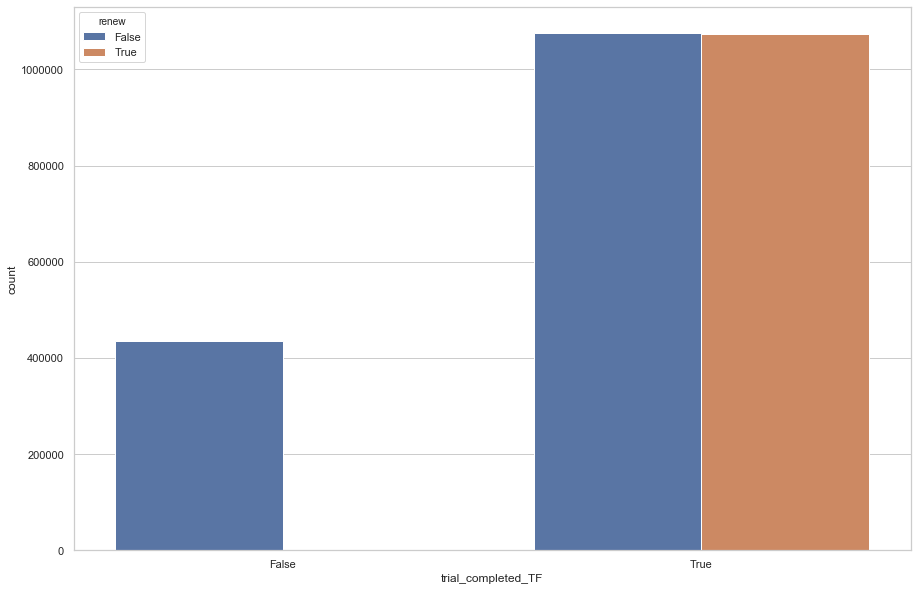

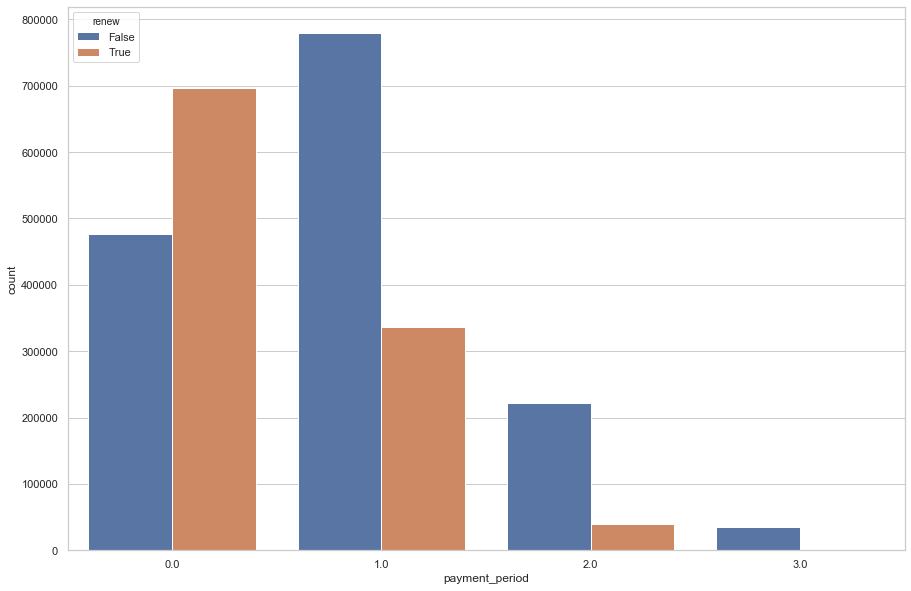

In [156]:
for j in categorical:
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    ax = sns.countplot(x = j,hue = "renew", data=df)

In [93]:
df2 = pd.merge(subscribers,csr, how = 'left')
df2 = df2.drop_duplicates()
len(df2)

302472

In [94]:
df2

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,current_sub_TF,cancel_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,False,2019-12-08 15:05:25,14.0,False,OTT,0.0000,0.0,2019-12-07 17:34:29,NaT,False
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302467,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,False,NaT,14.0,True,OTT,4.5875,0.0,2019-12-06 19:05:16,2019-12-21 10:05:18,True
302468,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,False,NaT,14.0,True,OTT,4.5875,1.0,2019-12-21 10:05:18,NaT,False
302469,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
302470,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN


In [179]:
df2['attribution_survey']

0         facebook
1         facebook
2         facebook
3               tv
4          youtube
            ...   
302467    referral
302468    referral
302469    facebook
302470    facebook
302471          tv
Name: attribution_survey, Length: 302472, dtype: object

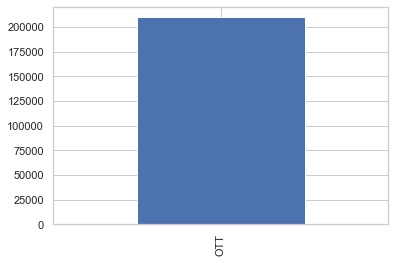

In [184]:
df2['billing_channel'].value_counts().plot.bar()

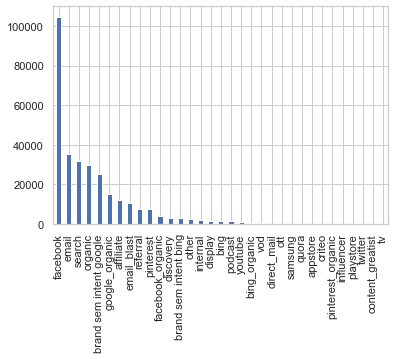

In [177]:
df2['attribution_technical'].value_counts().plot.bar()

In [125]:
df2.columns

Index(['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'creation_until_cancel_days',
       'cancel_before_trial_end', 'trial_end_date',
       'initial_credit_card_declined', 'revenue_net', 'join_fee', 'language',
       'paid_TF', 'refund_after_trial_TF', 'payment_type',
       'customer_service_rep_id', 'current_sub_TF', 'cancel_date',
       'num_trial_days', 'trial_completed_TF', 'billing_channel',
       'revenue_net_1month', 'payment_period', 'last_payment', 'next_payment',
       'renew'],
      dtype='object')

In [128]:
df2['join_fee'].value_counts(dropna=False)

 0.0367    136902
 NaN        63025
 0.0000     43435
 0.3303     30048
 0.6606     15035
 0.1101     12085
 0.3670      1731
 0.1835       164
-0.0367        11
 0.6973        10
 0.6239         9
 0.0734         4
-0.6606         2
 0.7340         2
 0.2936         2
 0.1468         2
 0.5872         1
 0.2569         1
 0.4037         1
-0.3303         1
-0.1101         1
Name: join_fee, dtype: int64

In [133]:
df2['renew'].value_counts(dropna=False)

False    129302
True     100024
True      73146
Name: renew, dtype: int64

In [134]:
yes_renew, no_renew = [x for _, x in df2.groupby(df2['renew'] == False)]

In [136]:
nah, yes_renew =[x for _, x in yes_renew.groupby(yes_renew['renew'] == True)]

In [137]:
yes_renew

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,current_sub_TF,cancel_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
6,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,...,True,NaT,14.0,True,OTT,4.5875,0.0,2020-02-19 19:45:46,2020-03-05 13:52:53,True
8,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,...,True,NaT,14.0,True,OTT,3.4498,0.0,2020-03-05 14:52:22,2020-03-20 13:54:48,True
17,26874196,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,True,NaT,14.0,True,OTT,4.5875,0.0,2020-03-09 04:05:24,2020-03-23 11:05:22,True
23,21511732,enhanced,2.320133,comedy,replace OTT,27.301448,1.849591,True,26.0,False,...,False,2020-04-12 09:52:49,14.0,True,OTT,3.2296,0.0,2019-11-11 05:57:52,2019-11-25 13:37:29,True
27,29576692,NaN,3.012358,NaN,expand international access,34.551230,1.927293,False,31.0,False,...,False,2019-09-07 18:15:13,14.0,True,OTT,4.5875,0.0,2019-07-13 06:42:02,2019-07-28 10:29:10,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302455,26828621,base,3.672180,drama,access to exclusive content,27.301448,2.317104,False,44.0,False,...,True,NaT,14.0,True,OTT,-0.6973,0.0,2020-02-26 02:12:05,2020-03-11 13:59:39,True
302457,28920930,enhanced,NaN,regional,replace OTT,NaN,NaN,False,NaN,False,...,True,NaT,14.0,True,OTT,4.9178,0.0,2019-09-14 18:31:21,2019-09-29 13:35:58,True
302458,28920930,enhanced,NaN,regional,replace OTT,NaN,NaN,False,NaN,False,...,True,NaT,14.0,True,OTT,4.9178,1.0,2019-09-29 13:35:58,2020-01-29 13:51:38,True
302462,21928274,base,NaN,drama,replace OTT,NaN,NaN,False,NaN,False,...,True,NaT,14.0,True,OTT,4.5875,0.0,2020-01-14 05:53:57,2020-01-28 13:52:00,True


KeyError: 'num_weekly_services_utilized'

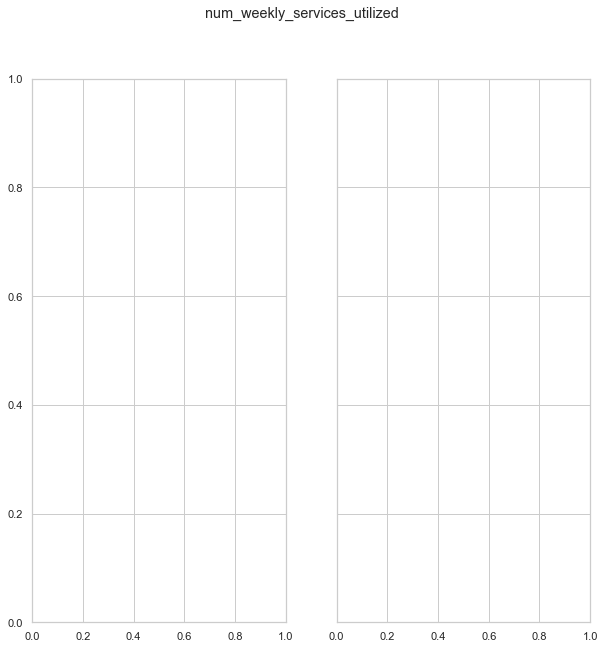

In [182]:
categorical = ['package_type', 'preferred_genre', 'intended_use', 'attribution_technical','attribution_survey','plan_type', 'monthly_price', 'discount_price']
numeric = ['num_weekly_services_utilized','weekly_consumption_hour', 'num_ideal_streaming_services', 'age']

# Split the data to two groups -- Group with deposit = yes and Group with deposit = no
# plot data using distribution plot for each numeric variable
for i in numeric:
    sns.set(style="whitegrid")
    #yes = df2.groupby('renew').get_group("True")
    #no = df2.groupby('renew').get_group("False")
    f, axes = plt.subplots(1, 2, figsize=(10, 10), sharey=True)
    f.suptitle(i)
    yes_array = pd.Series(list(yes_renew[i]), name="yes_renew")
    no_array = pd.Series(list(no_renew[i]), name="no_renew")
    sns.distplot(yes_array,ax = axes[0])
    sns.distplot(no_array,ax = axes[1])


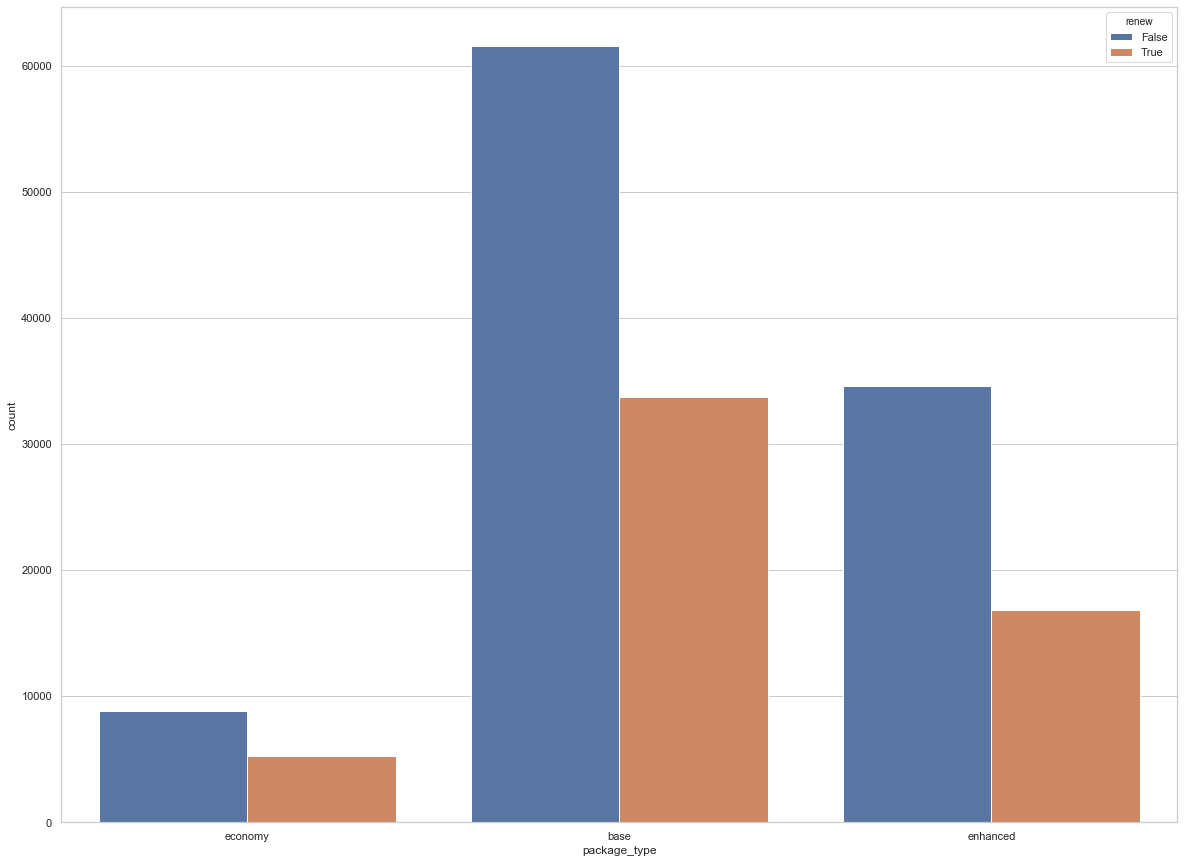

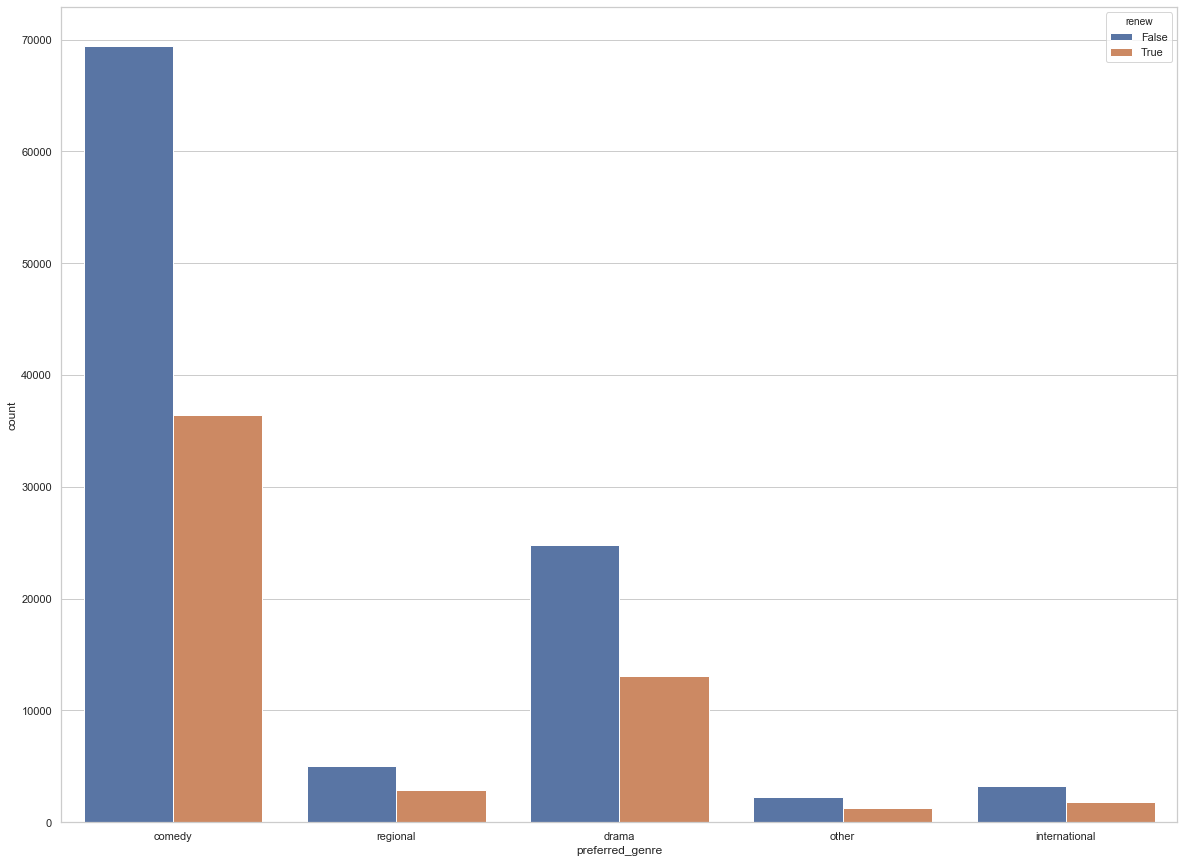

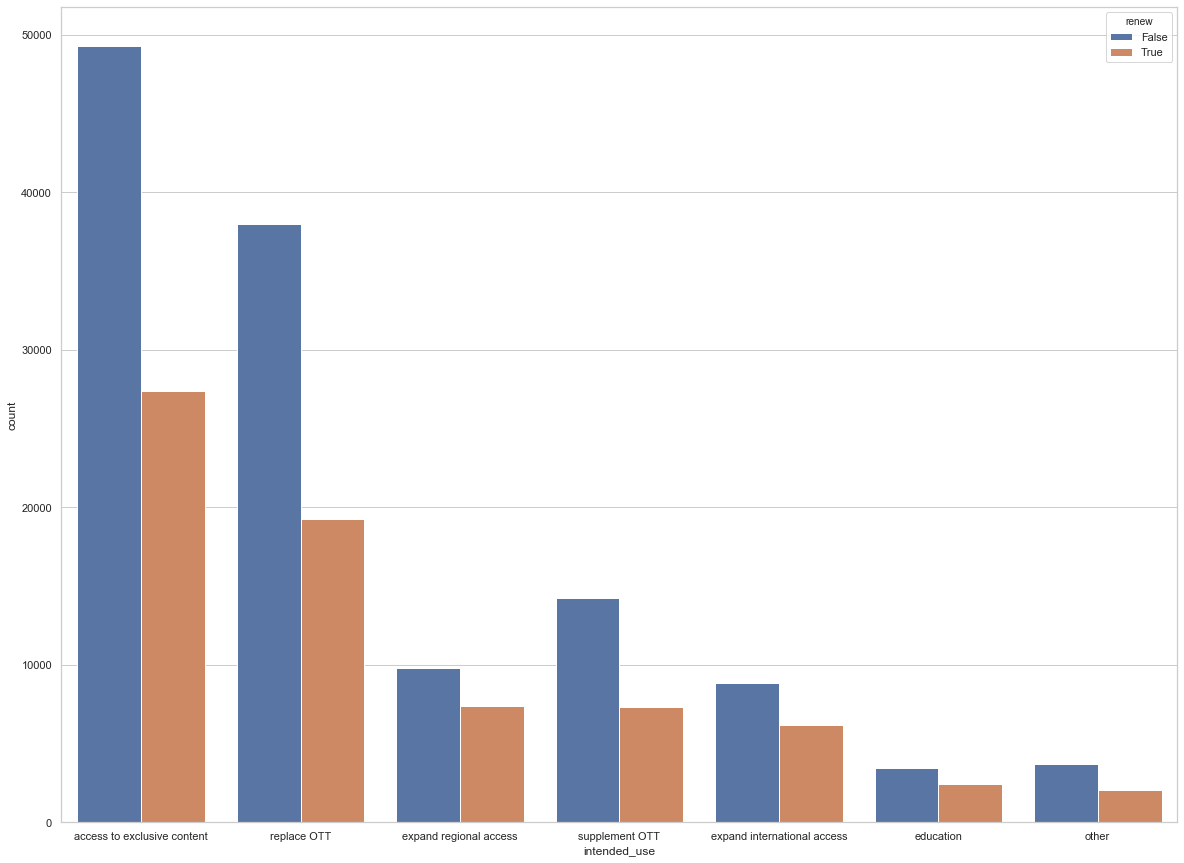

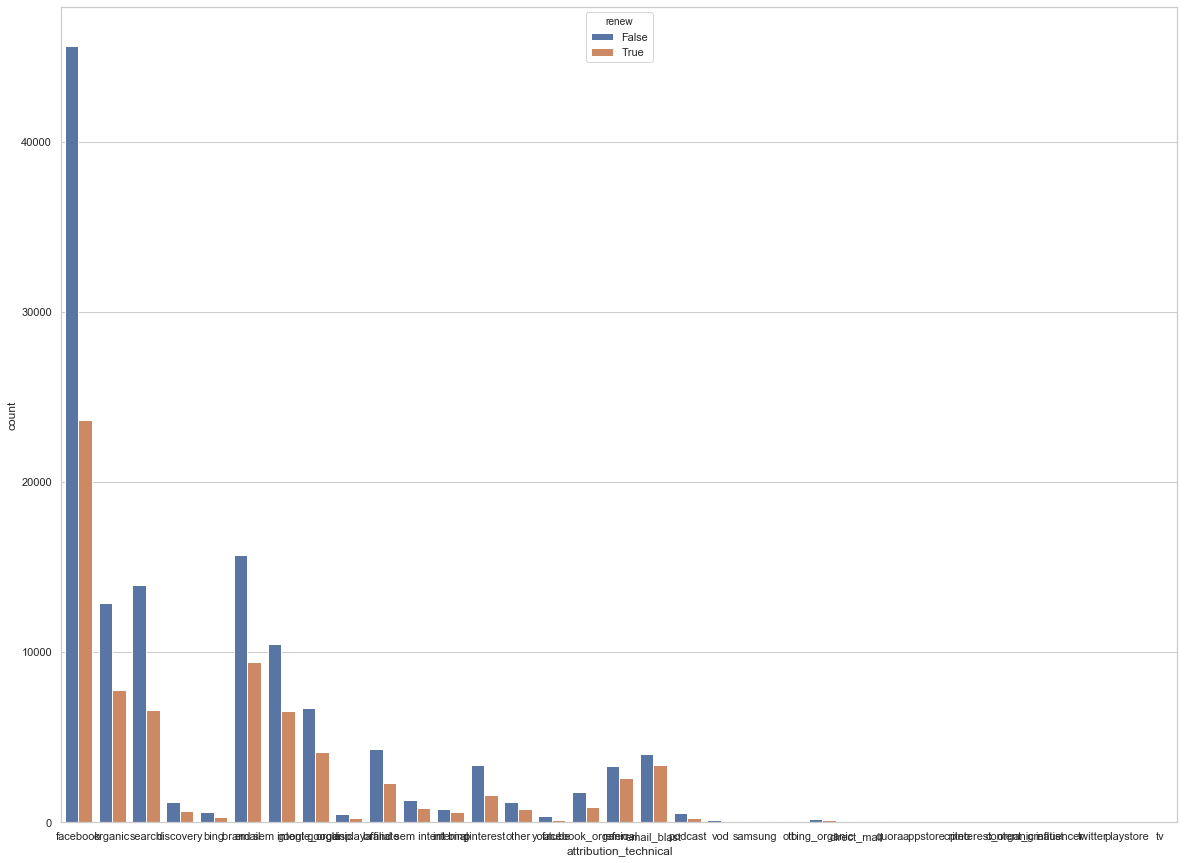

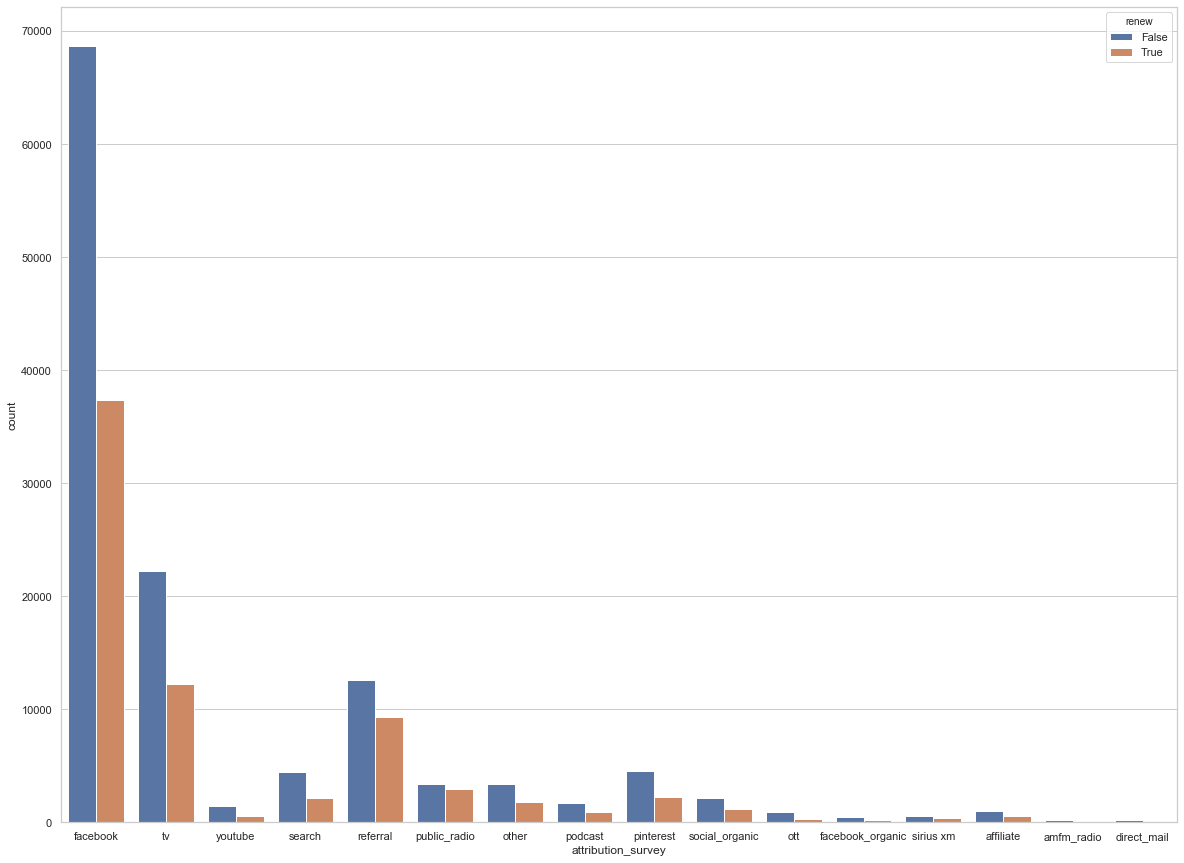

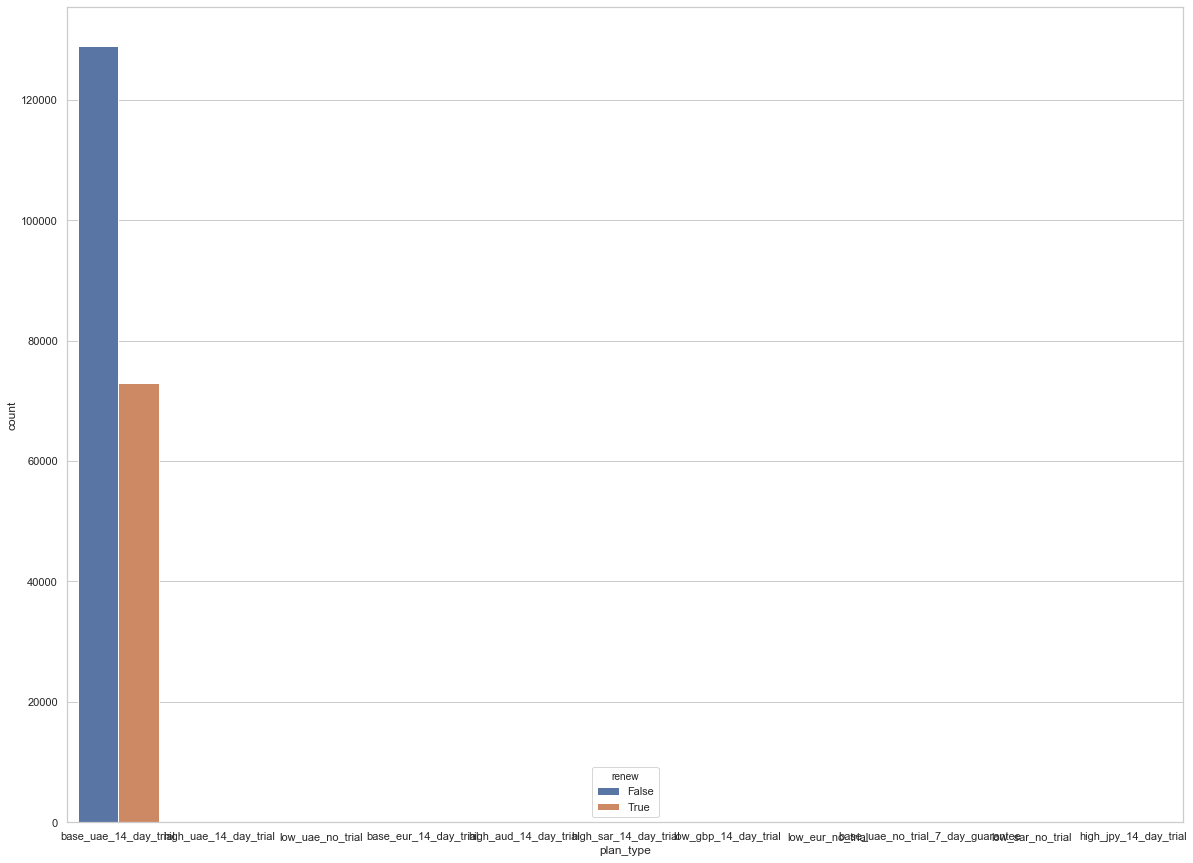

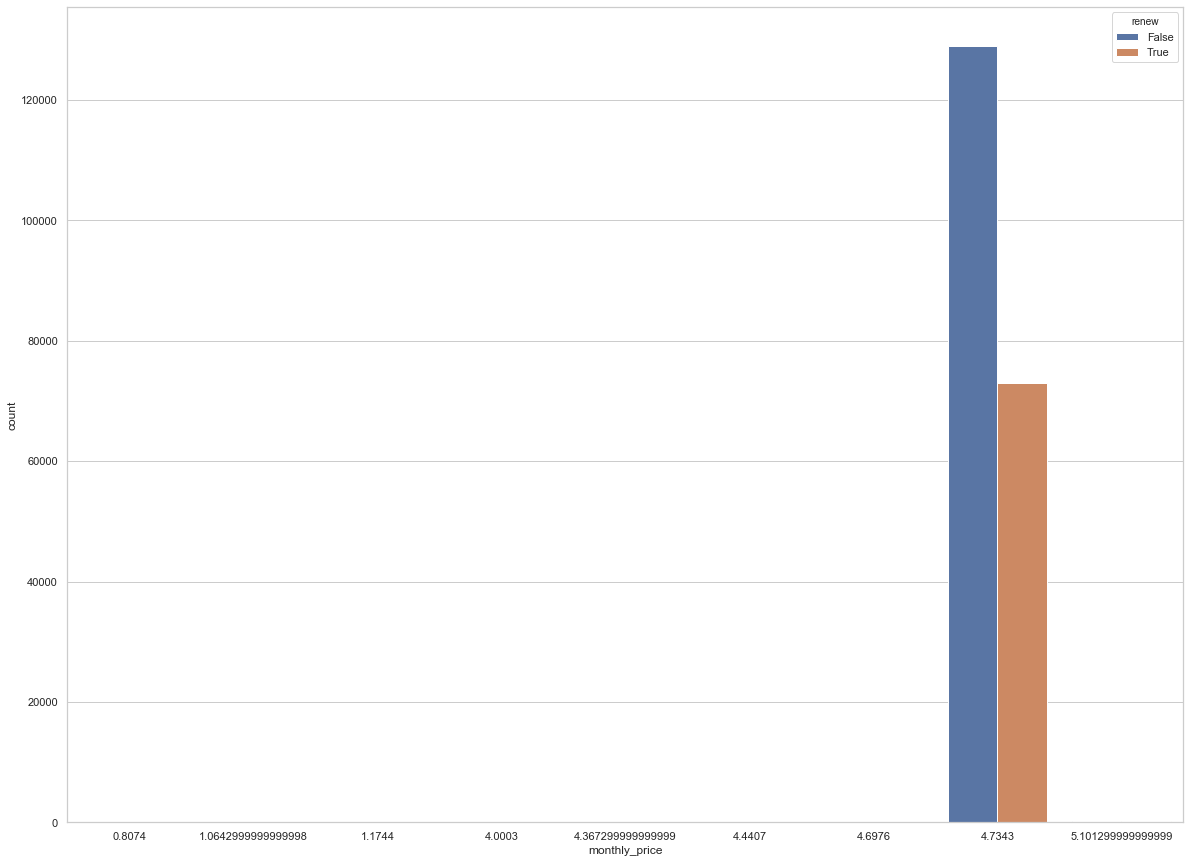

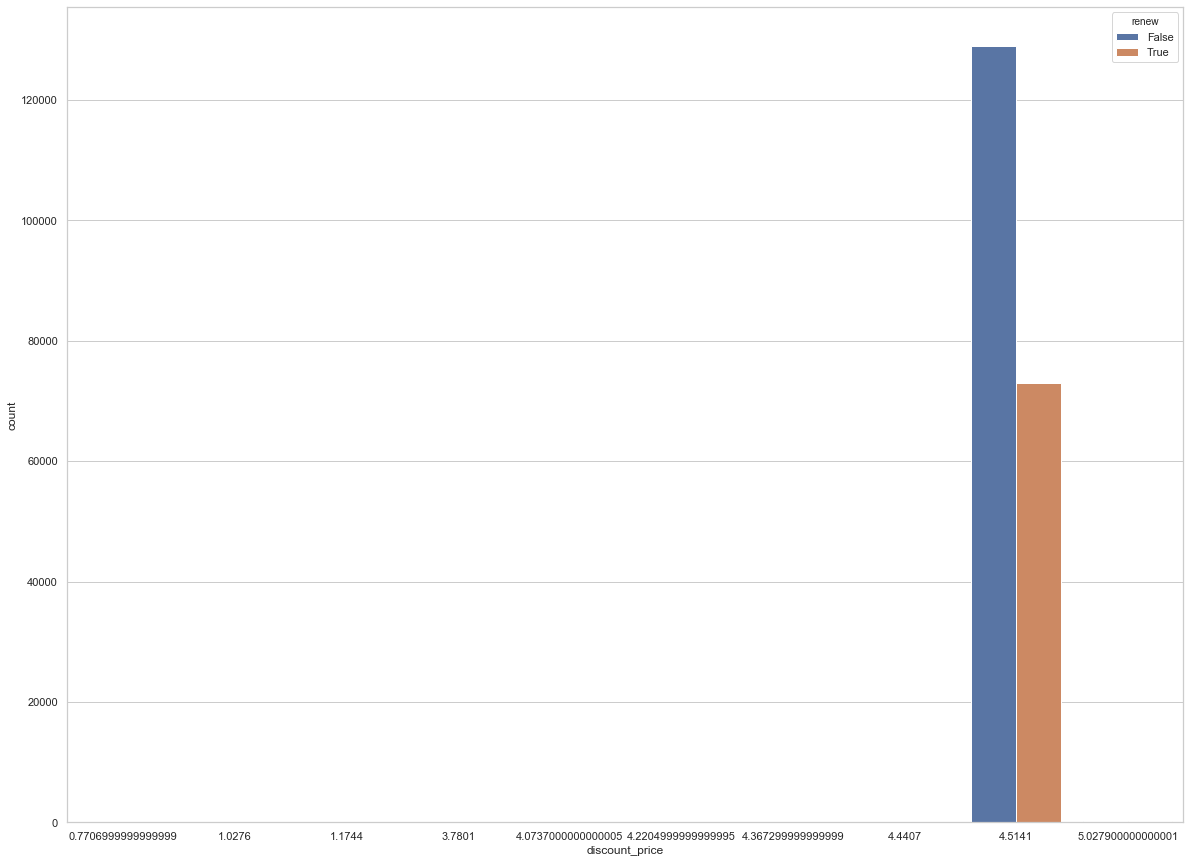

In [183]:
for j in categorical:
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
    ax = sns.countplot(x = j,hue = "renew", data=df2)

In [96]:
df2.to_excel('df2.xlsx', header = True, index = False)